<a href="https://colab.research.google.com/github/Shubhampapadkar/Mobile-Range-Price-Prediction/blob/main/Mobile_Range_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Mobile Range Price Prediction**

# **Project type** -  **Supervised Machine Learning (Classification)**

# **Contribution - Team**

# **Name** -
# **Team member 1 - Dinesh Jambhulkar**
# **Team member 2 - Renuka Jadhav**
# **Team member 3 - Shubham Papadkar**



                      

# **Project Summary**

## A mobile phone is a wireless handheld device that allows users to make and receive calls. While the earliest generation of mobile phones could only make and receive calls, today's mobile phones do a lot more, accommodating web browsers, games, cameras, video players and navigational systems.

## A smartphone is a handheld electronic device that provides a connection to a cellular network and the internet.

## The world's first smartphone was created by IBM in 1994, nicknamed Simon. 

## The project summary includes Data preprocessing , Exploratory Data Analysis,Implementation of Machine Learning Models.

# **Github link** :- https://github.com/Shubhampapadkar/Mobile-Range-Price-Prediction

## **Problem Statement**
## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

## The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, Camera etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Let's Begin**

# **1. Know Your Data**

##Import Libraries

In [1]:
# Importing the necessary libraries which is required to perform coding operations.

import pandas as pd                                                             # numerical computations
import numpy as np
import matplotlib.pyplot as plt                                                 # data manipulations
%matplotlib inline
import seaborn as sns                                                           # visualize with plots
import math

from sklearn.feature_selection import SelectKBest,chi2                          # Selecting the best k number of features from a dataset.
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression                             # logistic regression to perform binary
from sklearn.tree import DecisionTreeClassifier                                 # Decision tree to perform classification.
from sklearn.ensemble import RandomForestClassifier                             # ensemble classifier that uses multiple decision trees to perform classification.
from sklearn.neighbors import KNeighborsClassifier                              # The k-nearest neighbors algorithm to perform classification.
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV                                # grid search to optimize parameters
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import train_test_split                            # Split train and test data

from sklearn.tree import DecisionTreeClassifier, export_graphviz                # Decision tree model for classification.
from sklearn import tree                                                        # building and analyzing machine learning models.
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import warnings                                                                 # Do not disturb mode
warnings.filterwarnings('ignore')



# **Loading the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding**

In [3]:
# Reading the CSV (comma seperated value) file by using pandas operation.

df= pd.read_csv('/content/drive/MyDrive/Data CSV /data_mobile_price_range.csv', encoding= 'unicode_escape')

# **Dataset First View**

In [4]:
# Let's take a first look at the mobile range price prediction dataset.

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Dataset Rows and Column Count**

In [5]:
#  Let's Check the Shape of dataset.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 2000 rows and 21 columns.


# **Dataset Information**

In [6]:
# Information of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Duplicate Values**

In [7]:
# Checking for the duplicate values rows.(True indicates Duplicate values)

df.duplicated().value_counts()

False    2000
dtype: int64

## Here we shows that there is no duplicate value present in our dastaset.

# **Missing Values/Null Values**

In [8]:
# Checking the null values of data.

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## We don't have any object data type in our data set.

## Also we have Zero null values in data set.

## Price_range is our target variable.

Text(0.5, 1.0, ' Visualising Missing Values')

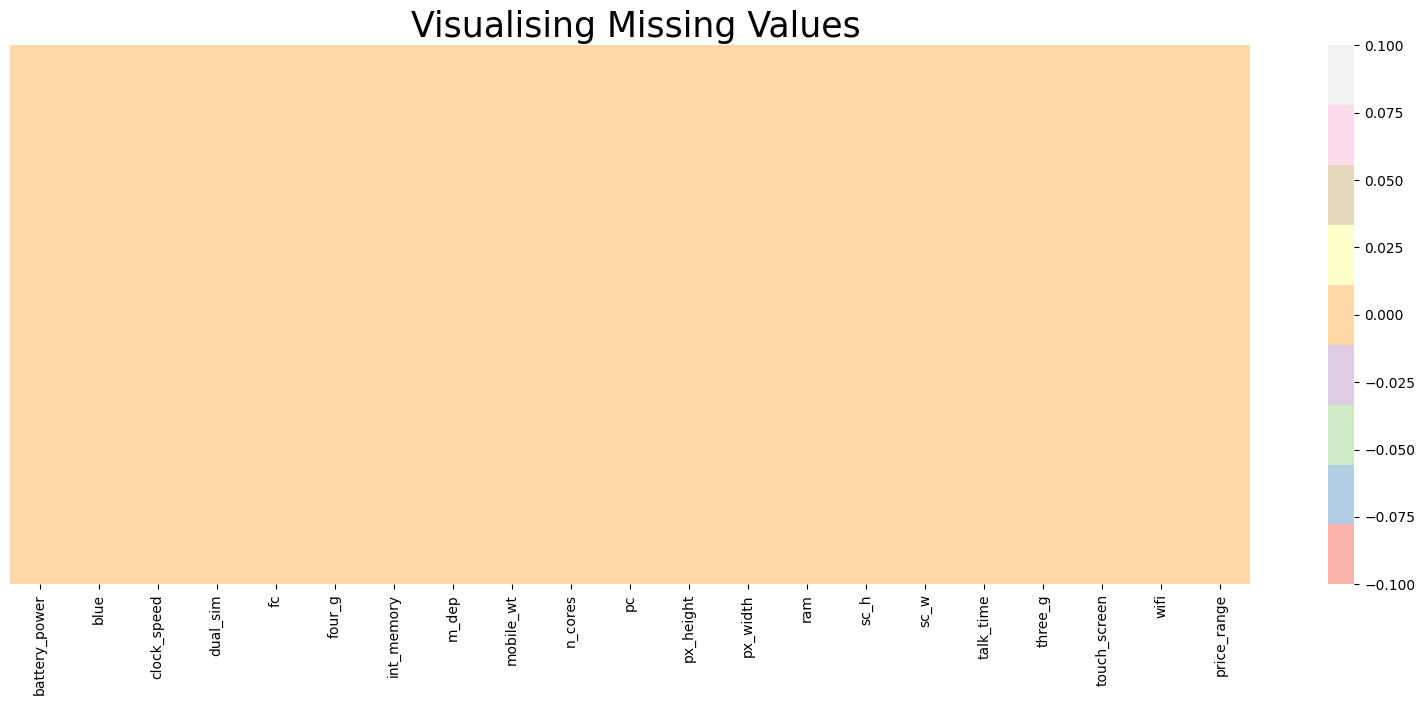

In [9]:
# Visualising Missing values using heatmap.

plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(),cmap='Pastel1',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values",fontsize=25)

## There are no missing values in our dataset, which is best for us.

# **2. Understanding the Variables**

# **Dataset Columns**

In [10]:
# List of columns present in our dataset.

list(df.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

# **Dataset Describe**

In [11]:
# Here we describe the dataset which shows aggregated and percentagewise values.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# **Variable Descriptions**

Battery_power - Total energy a battery can store in one time measured in MAH.

Blue - Has bluetooth or not.

Clock_speed - speed at which microprocessor executes instructions.

Dual_sim - Has dual sim support or not.

Fc - Front Camera mega pixels.

Four_g - Has 4G or not.

Int_memory - Internal Memory in Gigabytes.

M_dep - Mobile Depth in cm.

Mobile_wt - Weight of mobile phone.

N_cores - Number of cores of processor.

Pc - Primary Camera mega pixels.

Px_height - Pixel Resolution Height.

Px_width - Pixel Resolution Width.

Ram - Random Access Memory in Mega Bytes.

Sc_h - Screen Height of mobile in cm.

Sc_w - Screen Width of mobile in cm.

Talk_time - longest time that a single battery charge will last time.

Three_g - Has 3G or not.

Touch_screen - Has touch screen or not.

Wifi - Has wifi or not.

Price_range - This is the target variable with value of 0(low cost),1(medium cost),

2(high cost) and 3(very high cost).

# **Unique value  and it's Value Count of some variables.**

In [12]:
df.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [13]:
df.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [14]:
df.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [15]:
df.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

# **3. Data Wrangling**

In [16]:
# Before going any further let's first create a copy of our main dataset.

dfc= df.copy()

In [17]:
# Checking How many observations having px_height value as 0.

print(dfc[dfc['px_height']==0].shape[0])

2


In [18]:
# As there are only 2 observations having px_height=0. so we will drop it.

dfc=dfc[dfc['px_height']!=0]

## Here we drop the 2 rows where have zero Values in Pixel Height Features .

# **4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [19]:
# lets have look at our target variable's counts

dfc.price_range.value_counts()

2    500
0    500
1    499
3    499
Name: price_range, dtype: int64

## From the above data here it we shows that, Our dependent variable is price_range and we have four price ranges as target our values.

## This dataset is a balanced dataset, i.e., each class has  nearly 500 mobile phones.
## (0 -> low cost, 1 -> medium cost, 2 -> high cost, 3 -> very high cost).

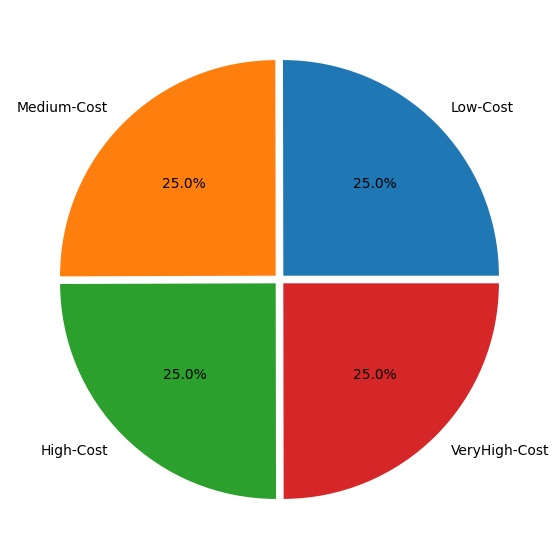

In [20]:
# Plotting a pie chart of price range features.

prices_labelling = ['Low-Cost', 'Medium-Cost', 'High-Cost', 'VeryHigh-Cost']
data = dfc['price_range'].value_counts()

# Creating the plot.

fig = plt.figure(figsize=(17,7))
plt.pie(data, labels = prices_labelling, autopct='%1.1f%%',explode = (0.025,0.025,0.025,0.025), shadow= False, )
plt.show()

## We can see that our target variable is equally distributed.

## Thus  we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.

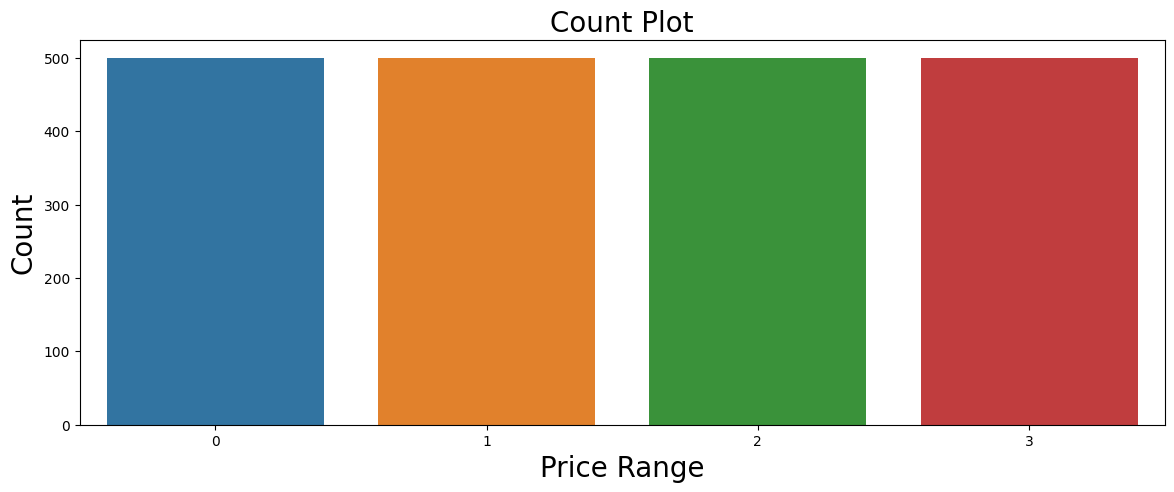

In [21]:
# Plotting the count plot for price_range.

plt.figure(figsize=(14,5))
sns.countplot(x = df['price_range'])
plt.title("Count Plot",fontsize = 20)
plt.xlabel("Price Range",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.show()

## Here we shows that count of in each category of price range is similiar.

---



# **Let's find the correlation between variables.**

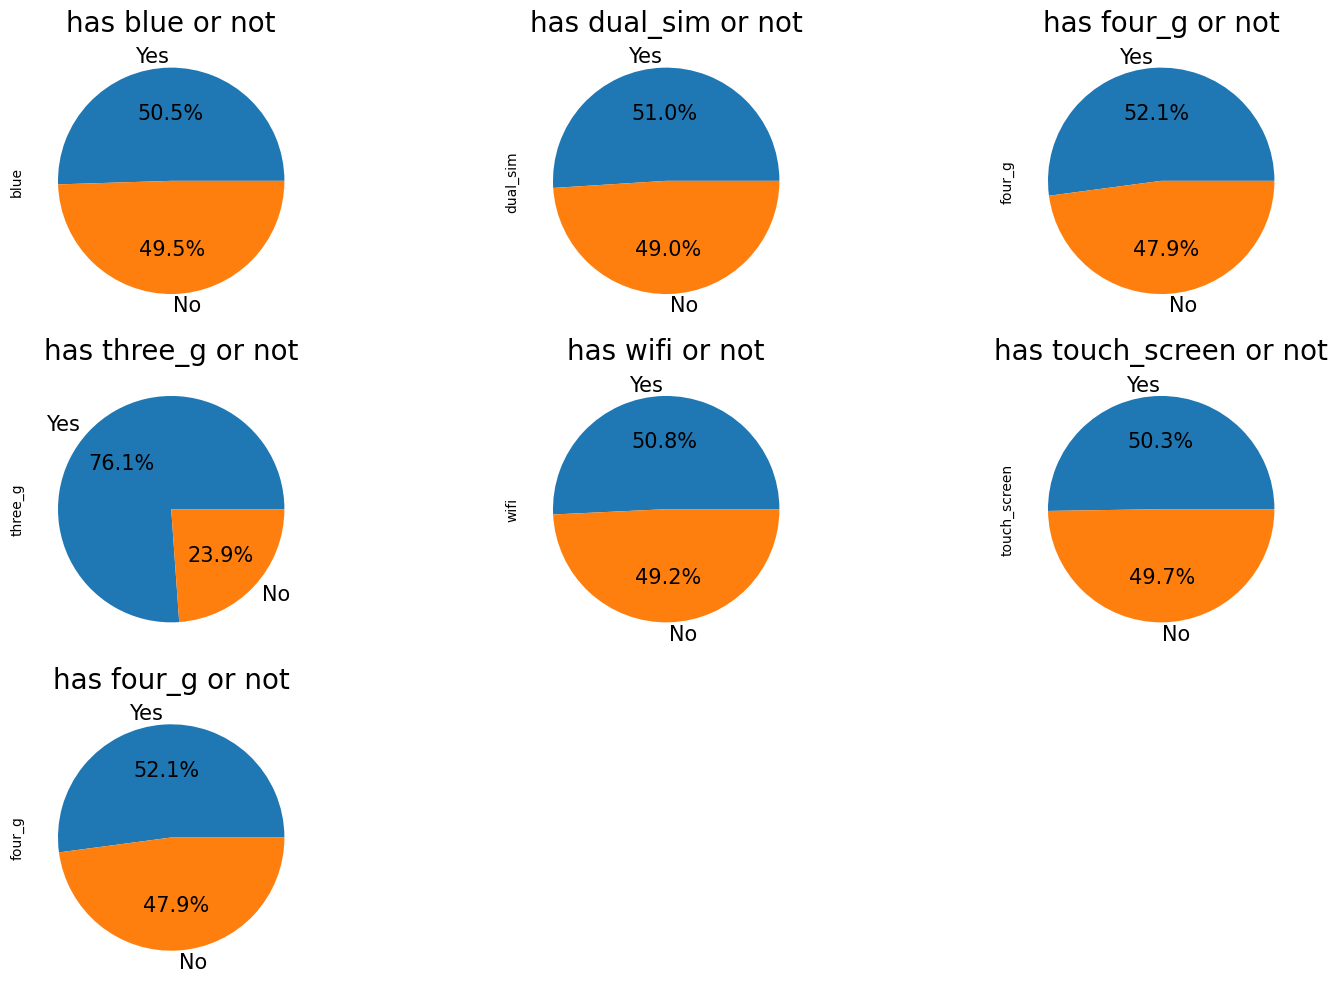

In [22]:
# Plotting the pie charts for binary categorical variables.

plt.figure(figsize=(15,10))

rows=3
col=3
count=1
features_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen','four_g']
labels=['Yes','No']
for var in features_list:
  plt.subplot(rows,col,count)
  dfc[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=15,labels=labels)
  plt.title(f'has {var} or not',fontsize=20)
  plt.tight_layout()
  count=count+1

## Blue colour indicates it has the specifications,while orange colour indicates it do not have the specifications.

## All features has plotted the above pie chart shows nearly 50 percent equality except 3G sim card feature, which shows nearly 76 percent mobile phones who supports the 3g.

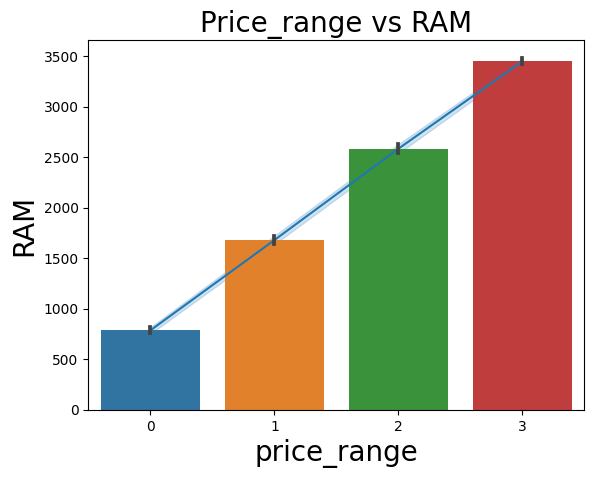

In [23]:
# Plotting the bar plot and line plot of price_range with Considering RAM features.

sns.lineplot(x=dfc['price_range'],y=dfc['ram'])
sns.barplot(x=dfc['price_range'],y=dfc['ram'])
plt.rcParams['figure.figsize']=[12,7]
plt.title('Price_range vs RAM',fontsize=20)
plt.xlabel('price_range',fontsize=20)
plt.ylabel('RAM',fontsize=20)
plt.show()

## Using this Bar plot and Line plot simaltaneously it shows that as far as RAM specifications such as bytes are increase ,then price range is also increased.
## So there is positive correlation seems between these variables.

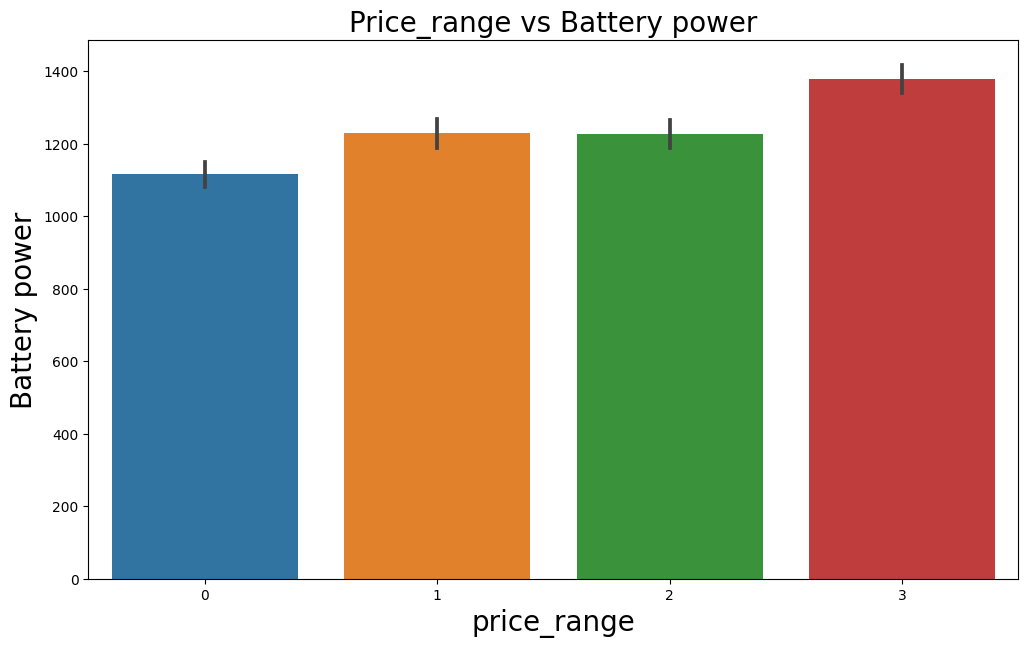

In [24]:
# Plotting of price range with respect to battery power.

sns.barplot(x=dfc['price_range'],y=dfc['battery_power'])
plt.rcParams['figure.figsize']=[14,6]
plt.title('Price_range vs Battery power',fontsize=20)
plt.xlabel('price_range',fontsize=20)
plt.ylabel('Battery power',fontsize=20)
plt.show()

## Mobiles with battery power more than 1300 MAH has very high cost. And Mobiles with battery power between 1200 and 1300 MAH falls under medium and high cost category.

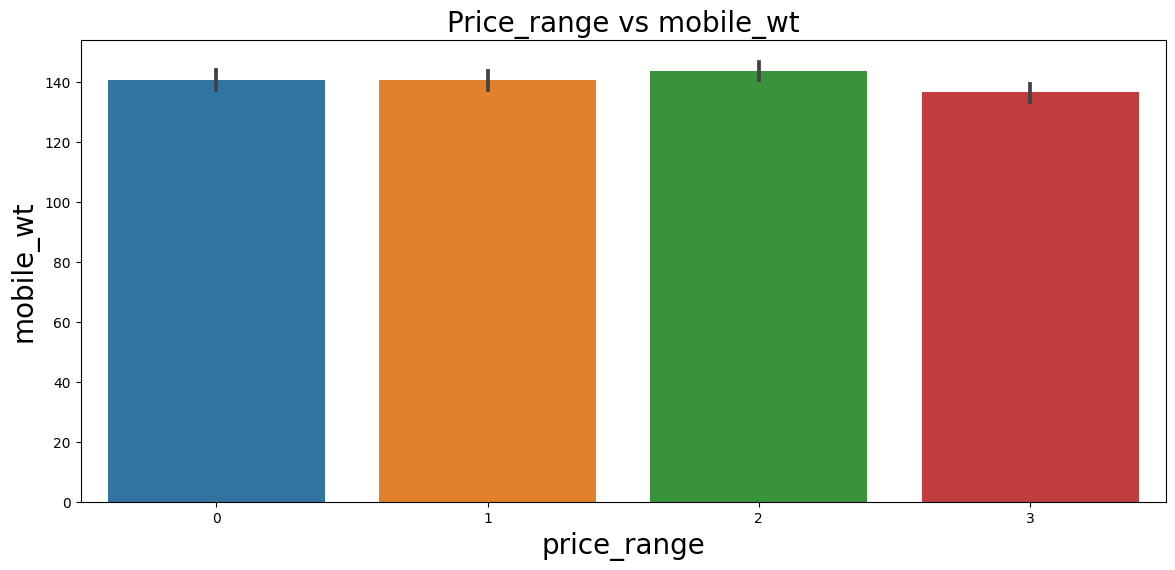

In [25]:
# Plotting of price range with respect to Mobile Weight.

sns.barplot(x=dfc['price_range'],y=dfc['mobile_wt'])
plt.rcParams['figure.figsize']=[14,6]
plt.title('Price_range vs mobile_wt',fontsize=20)
plt.xlabel('price_range',fontsize=20)
plt.ylabel('mobile_wt',fontsize=20)
plt.show()

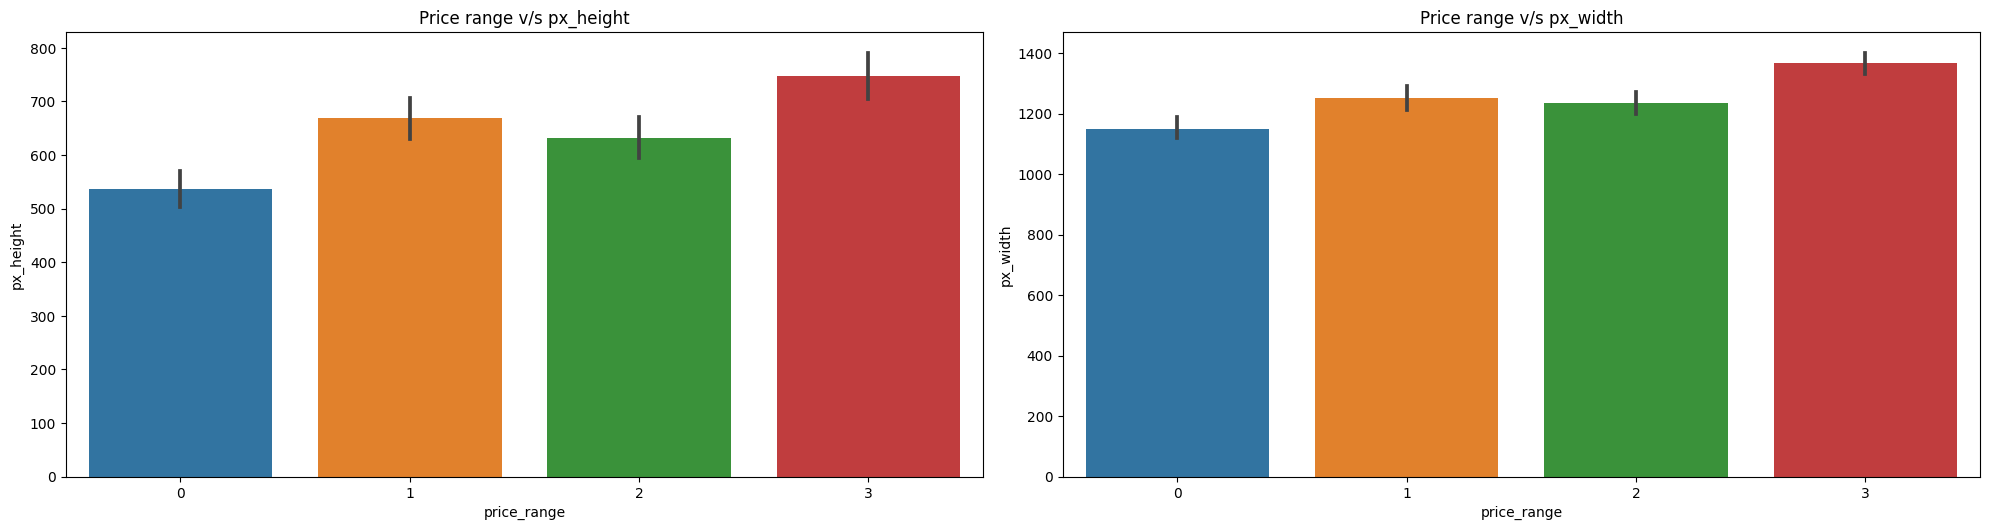

In [26]:
# Graphical representation of price range with Pixel Height and Pixel Width.

plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=dfc['price_range'],y=dfc[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

# Mobiles with more than 700 pixel height and width more than 1300  width has very high cost.


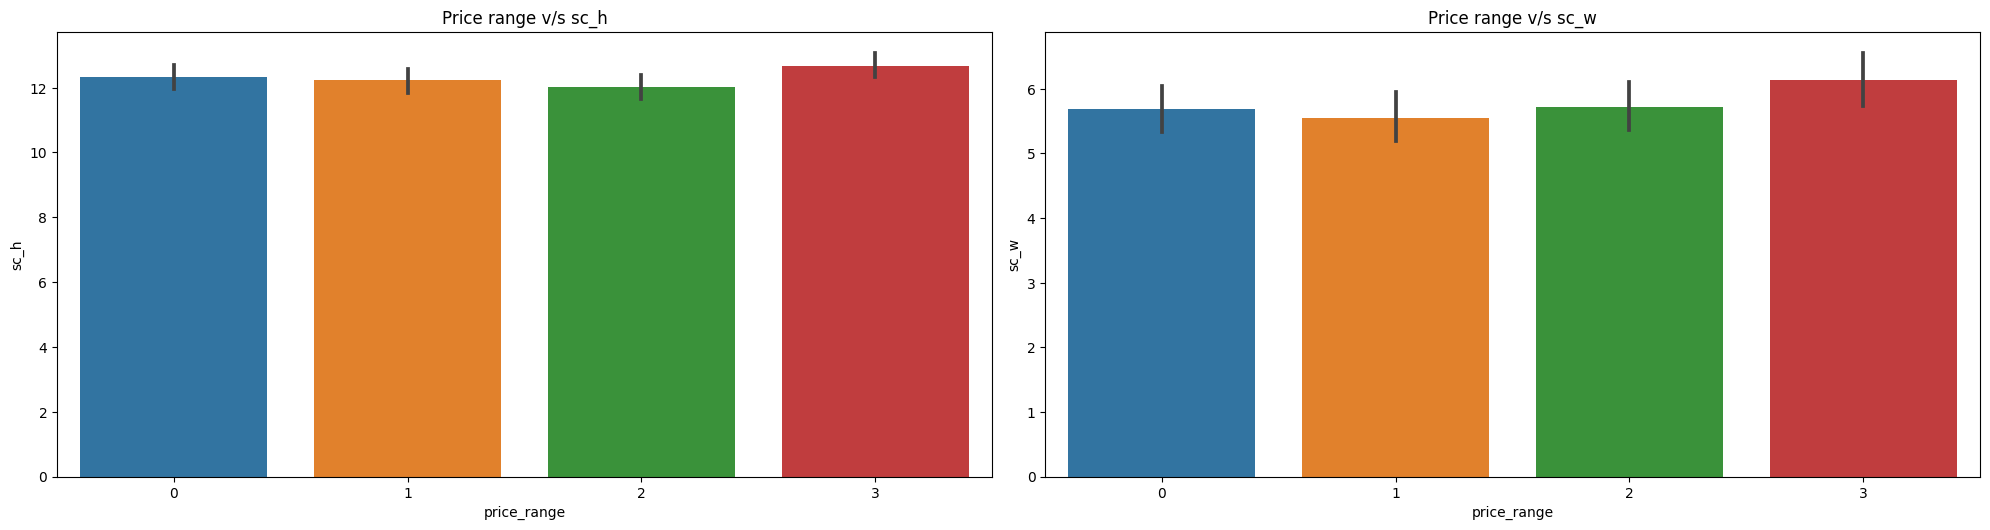

In [27]:
# Graphical representation of price range with Screen Height and Screen Width.

plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['sc_h','sc_w']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=dfc['price_range'],y=dfc[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()


## Mobiles with more Screen Height and more Screen width have High Cost.

# **Let's find out From the Graphical Representation which features drives the most price range.**

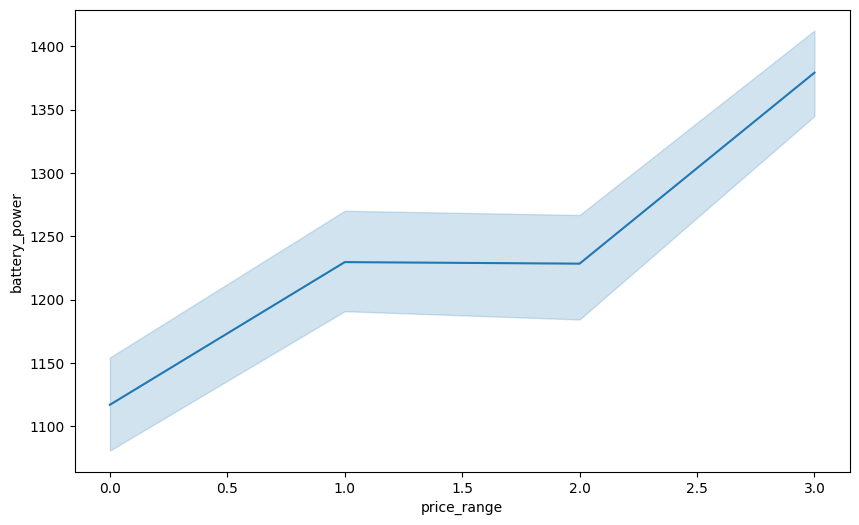

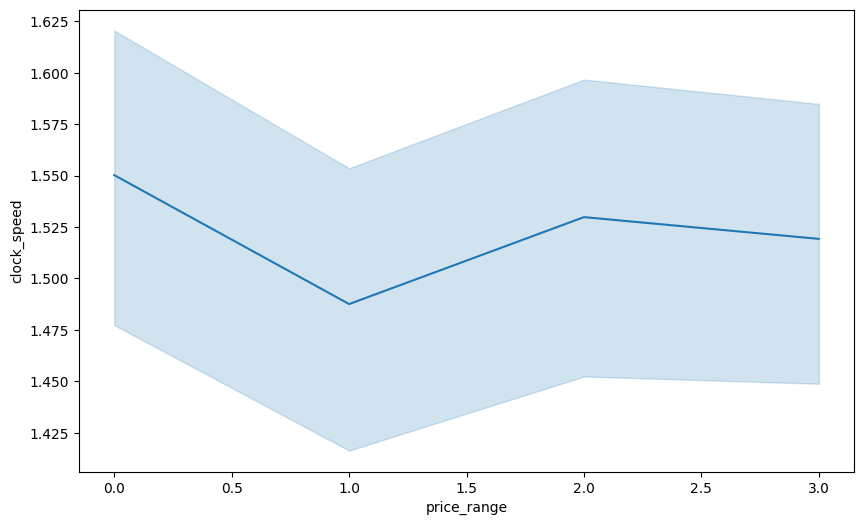

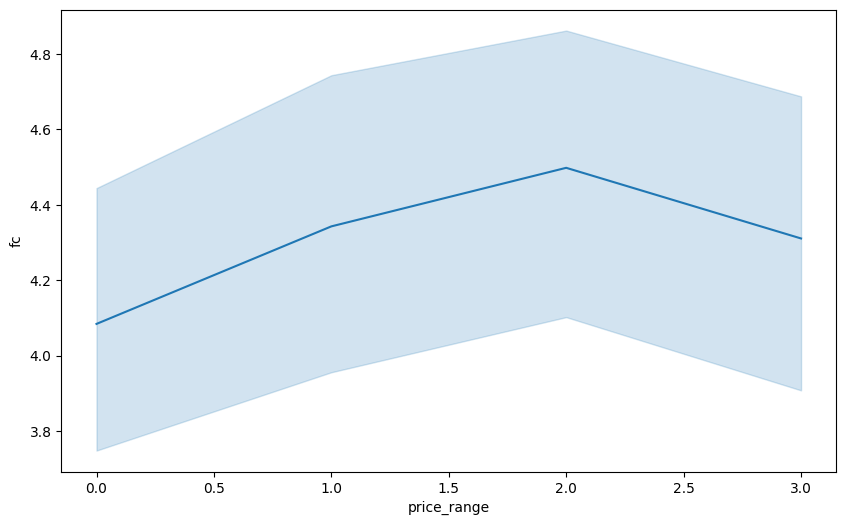

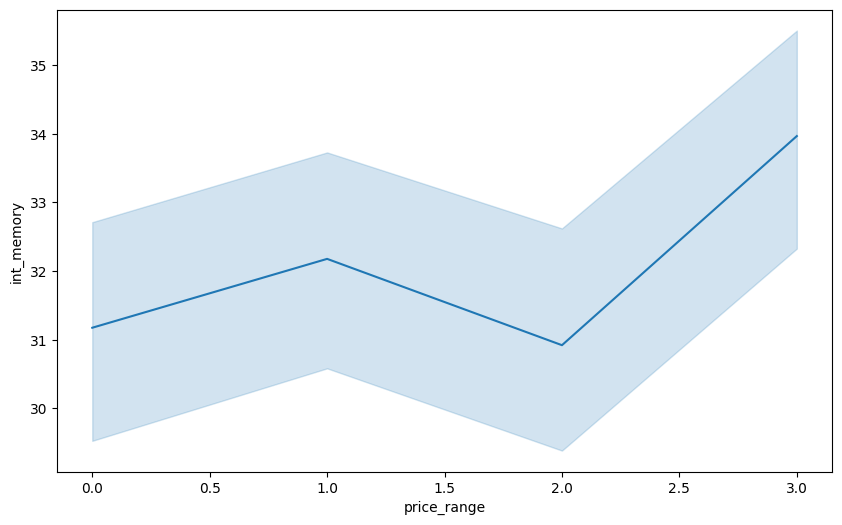

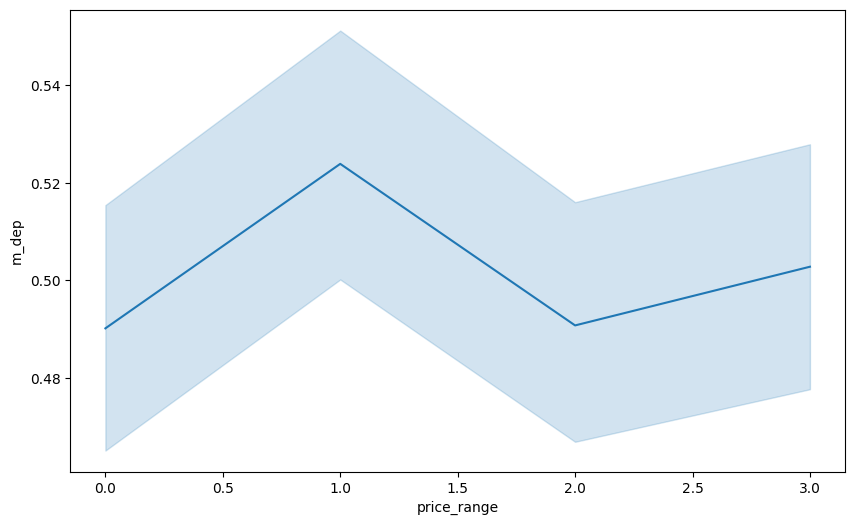

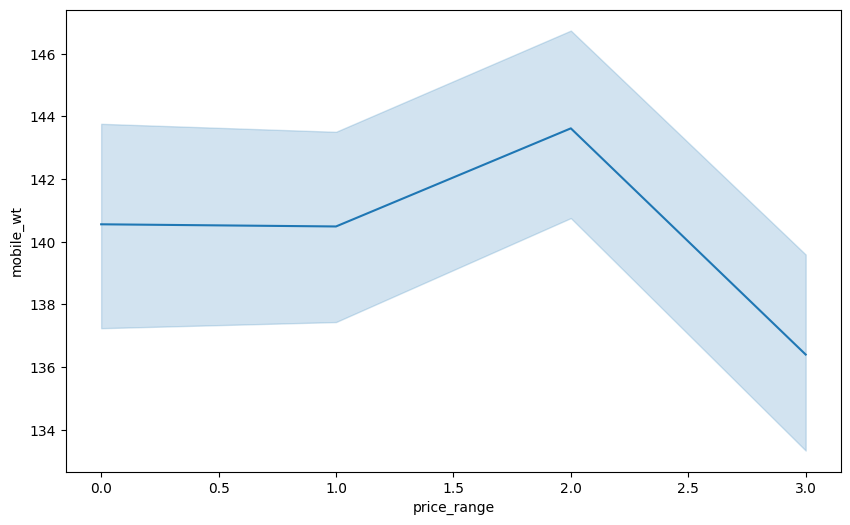

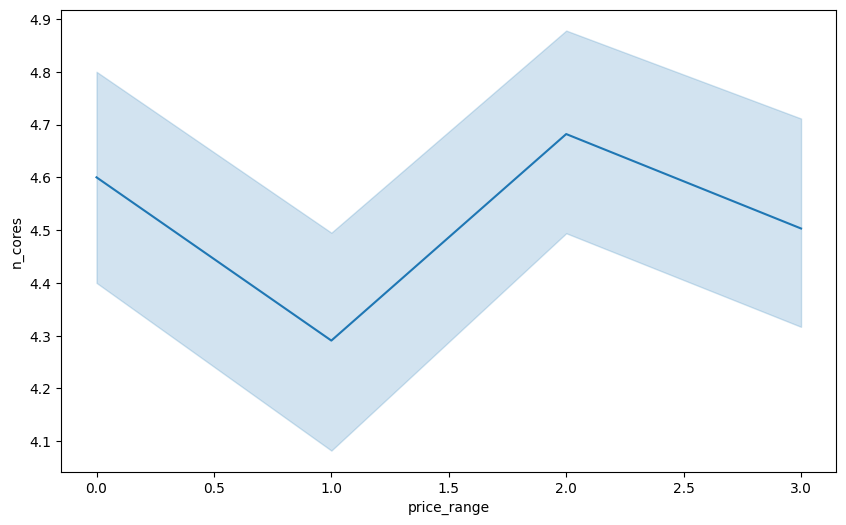

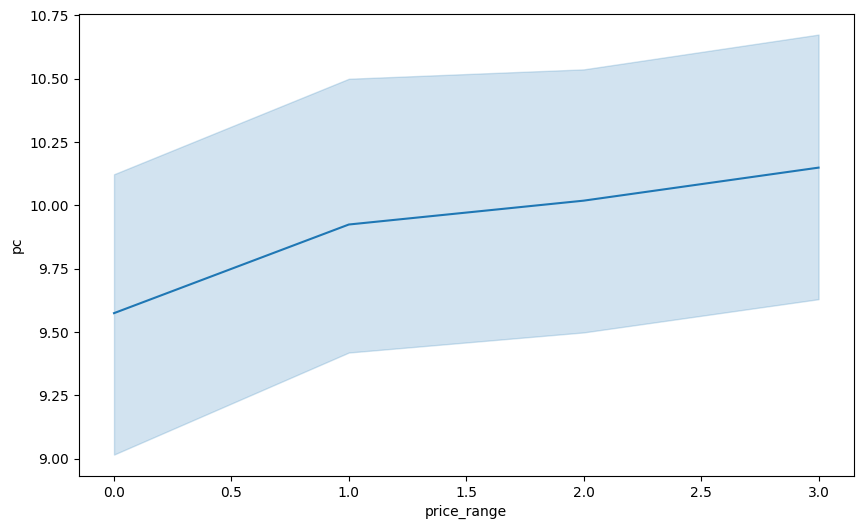

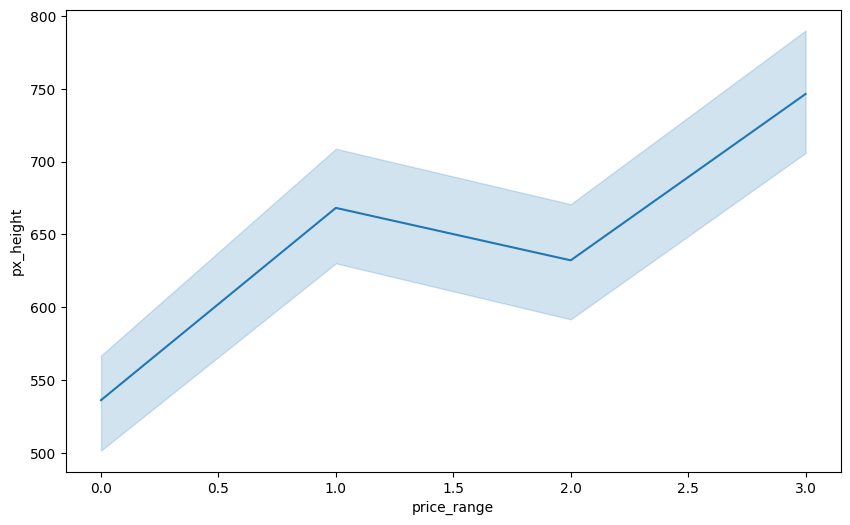

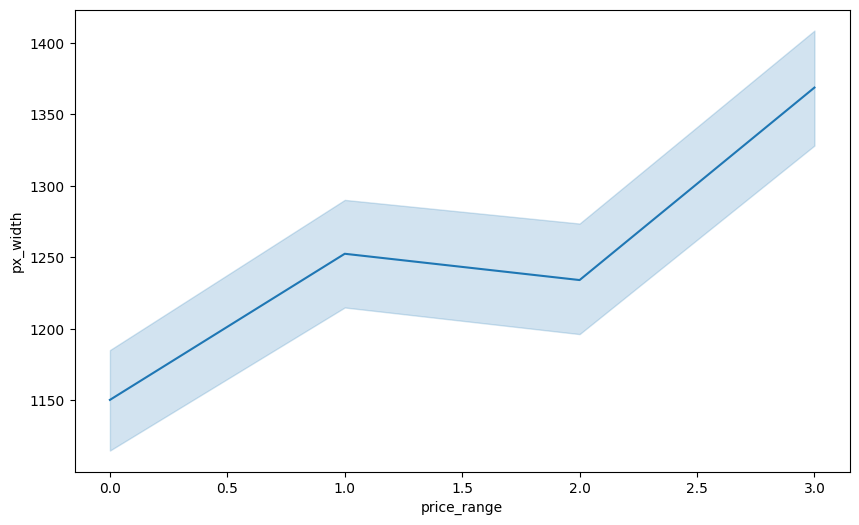

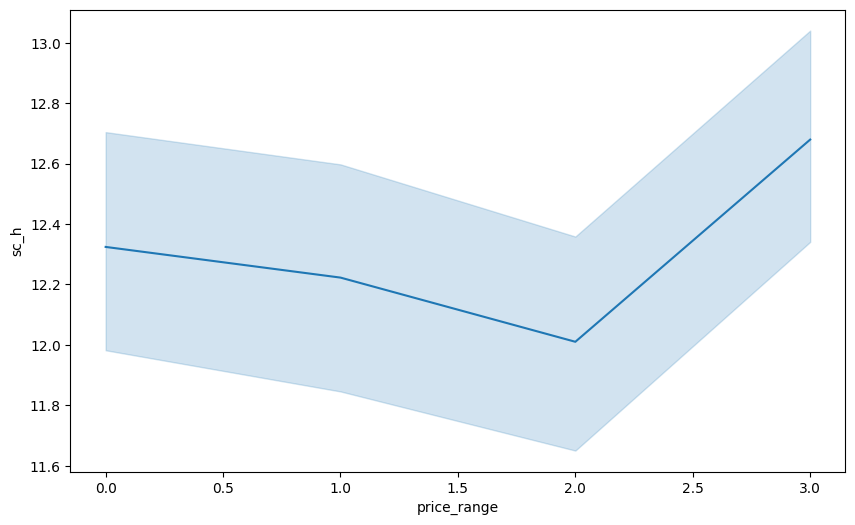

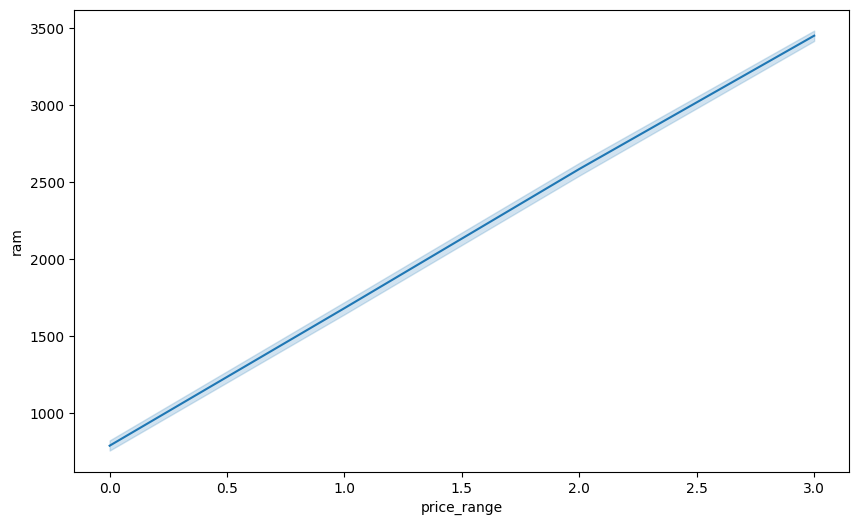

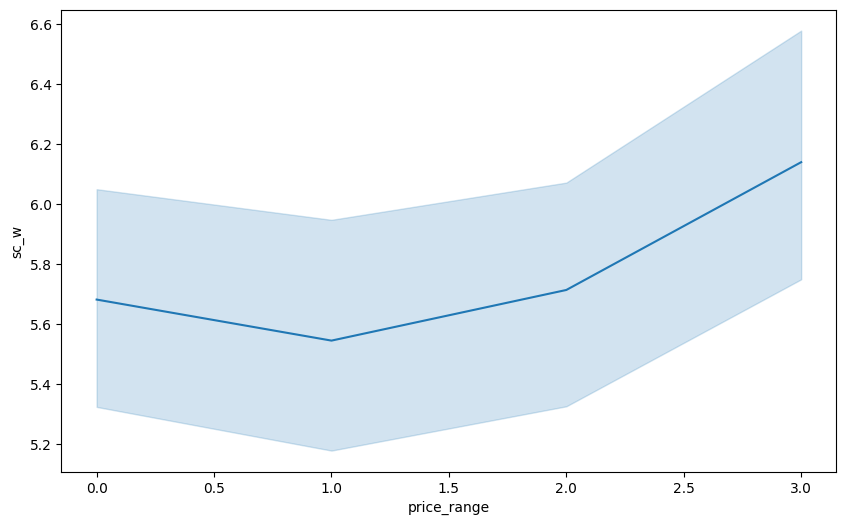

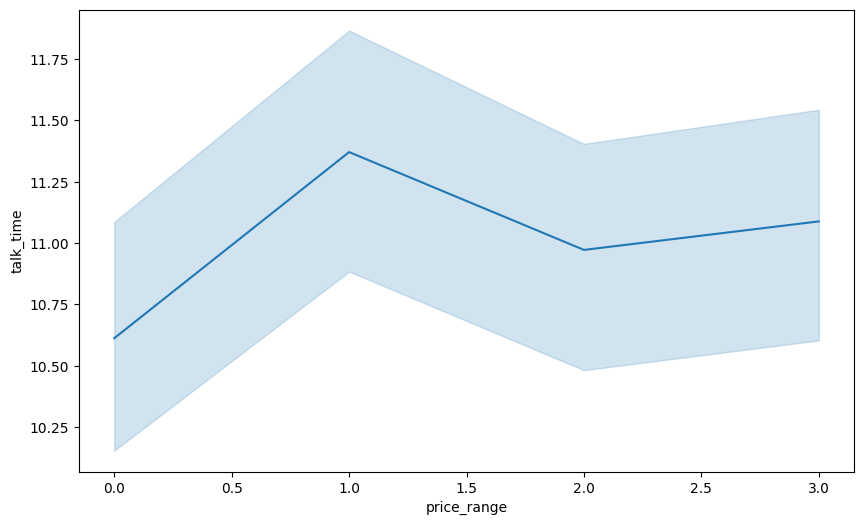

In [28]:
# Graphical representation of using line plot of Variables with respect to Price Range.

features_list=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
for individual_feature in features_list:
    plt.figure(figsize=(10,6))
    
    sns.lineplot(x=dfc['price_range'],y=dfc[individual_feature])

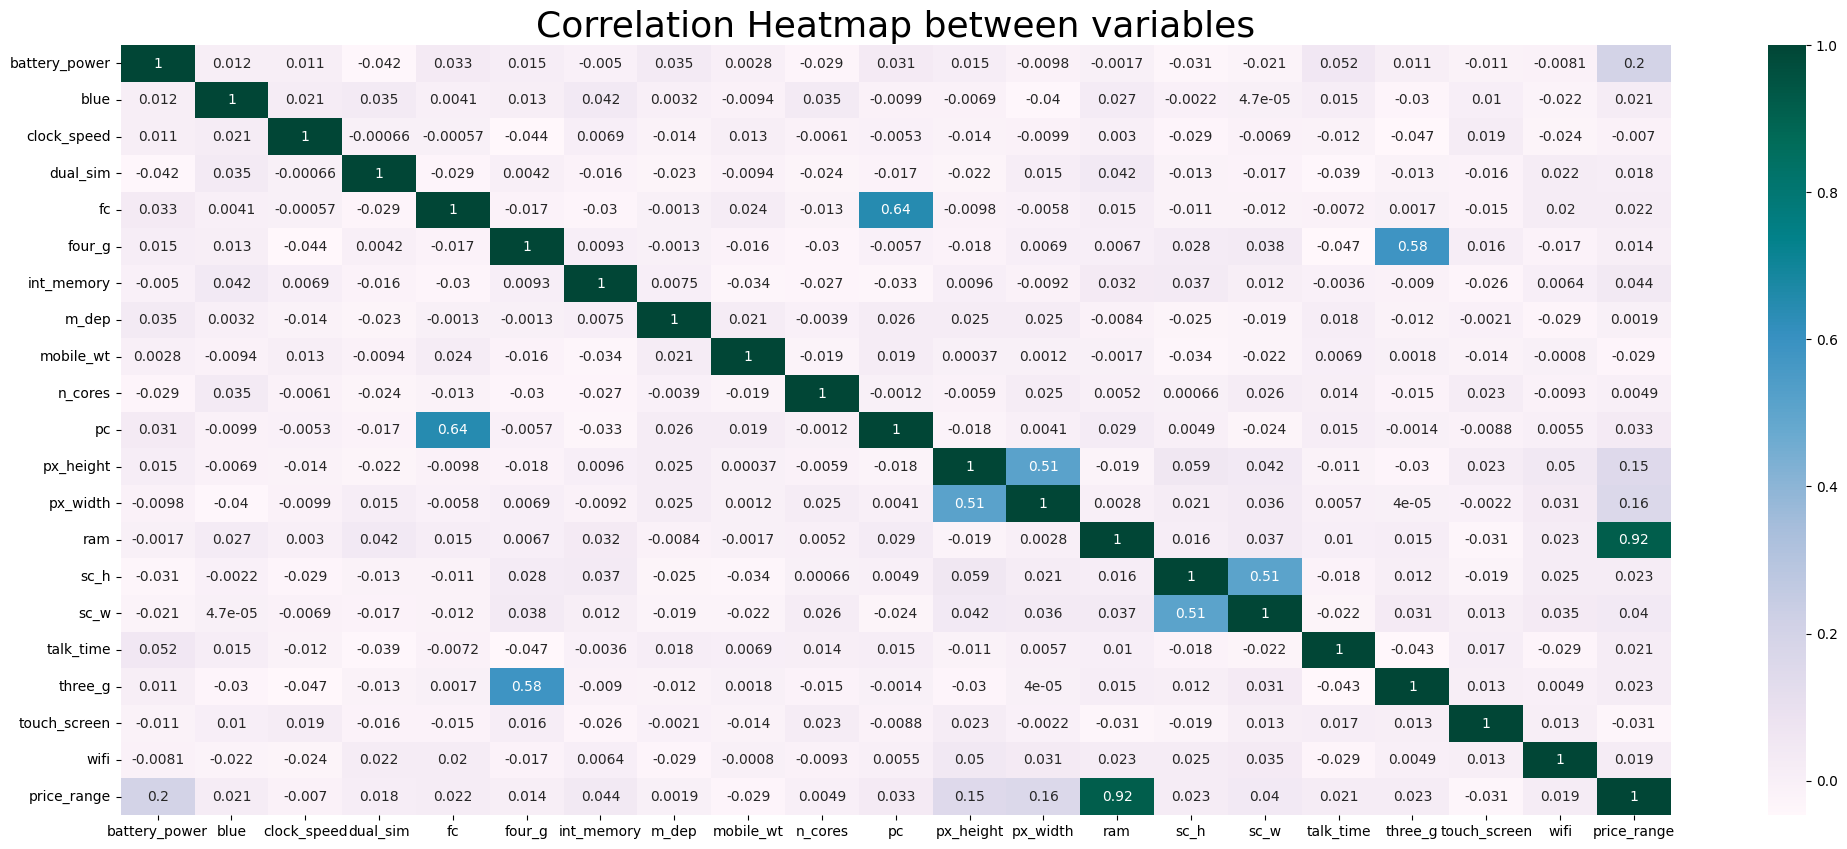

In [29]:
# Plotting the correlation between the variables using heatmap.

correlation_plot = dfc.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlation_plot, annot=True, cmap='PuBuGn')
plt.title("Correlation Heatmap between variables",fontsize=26)
plt.show()

# **The above plot shows the correlation of variables among between them**.

   **1.ram(Random Access Memory) relation with  price_range** - RAM is the highest correlate with price of mobile phone so,it shows  that it is most important and expensive feature respect to remaining all features.

   **2.fc(Front Camera mega pixels) relation with pc(Primary Camera mega pixels)**  -The relationship between front and back camera depends on the device design and its intended use, and can vary greatly from one device to another.

   if a phone has a great rear camera, it has to match great standards for the front camera as well.

   **3.Battery power relation wih price of mobile phone** - The battery of mobile is slightly positive impact on mobile because ,mobile phone's battery technology can also impact its overall performance and user experience.

   battery is managed by the phone's software and hardware can also affect its performance and lifespan.

   Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.

   **4. latest version four_g(4G) and existing version three_g(3G)** - 4g is the latest version of mobile phone, If the phone supports 4g version it means 3g version is already exist in mobile phone and also compatible with this .

   **5. px_height and px_width** -(Pixel Resolution Height and width) are positively correlated with price range.Generally High price range mobiles have good resolutions.

**6.The Ram size and Battery power** -This shows indirect (Negative) co-relationship ,from the above plot its shows that the ram size and battery power have very less correlate with each other.

The larger the ram size the more power a mobile device will consume.

**7.sc_h and sc_w** - It shows positively correlated with each other,

**8.Mobile weight and its pixel width** - It shows exponentially correlate with each other ,it shows that the effect of pixel width on mobile weight is negligible.

**9. mobile depth and price range** - This features are less correlate with each other it shows that the depth of mobile phone is not significantly effect on its price range as compared to RAM,Battery power,Display resolution ,camera .

# **Feature Engineering & Data Pre-processing**

# **Dealing with Outliers**

# Outlier Detection

In [30]:
dfc.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [31]:
dfc.shape

(1998, 21)

In [32]:
# numeric col list.

numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

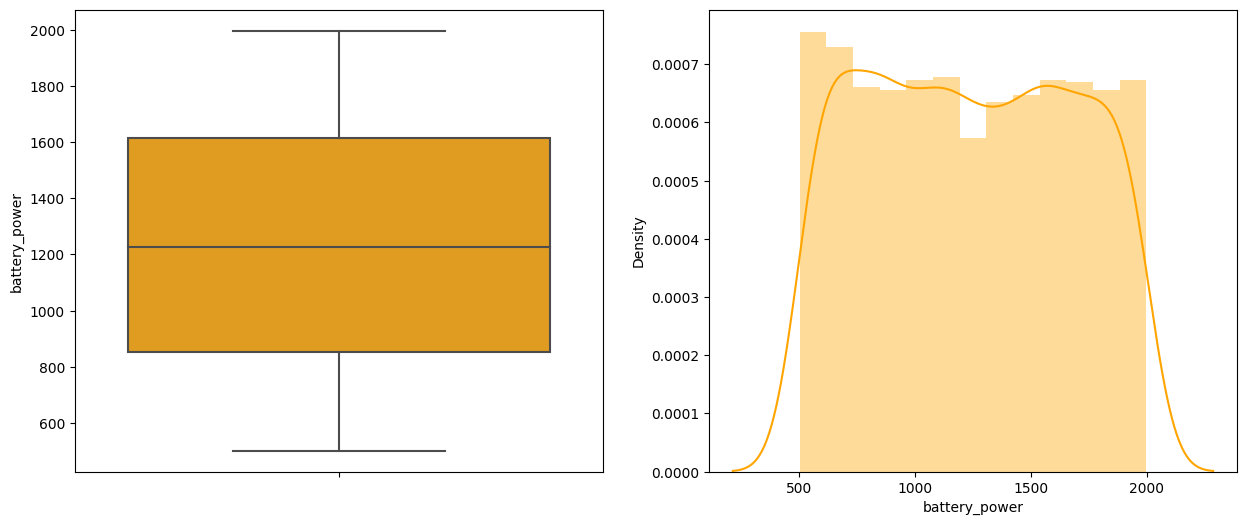

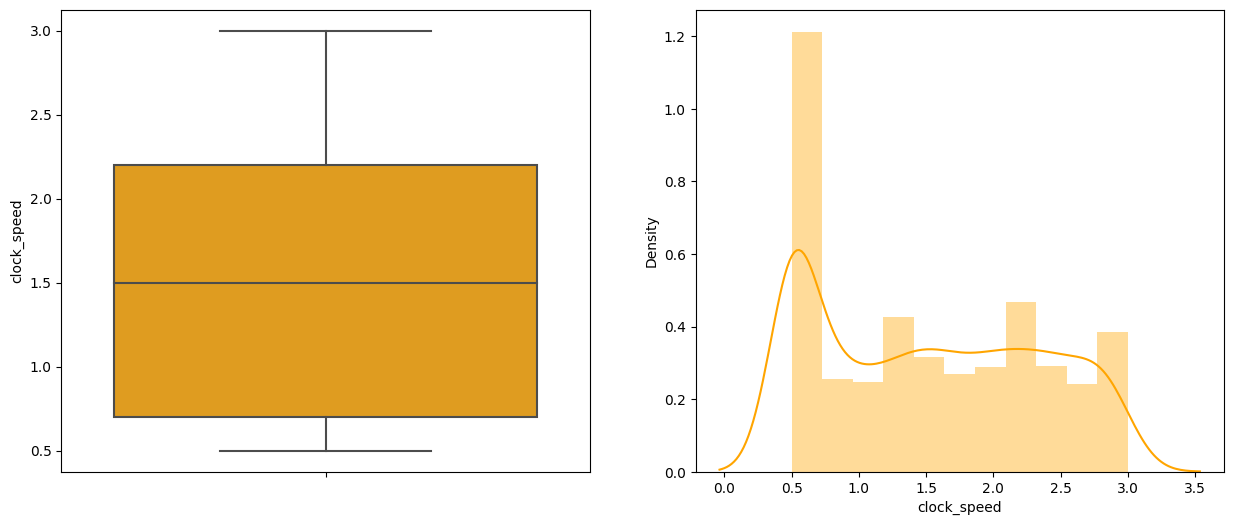

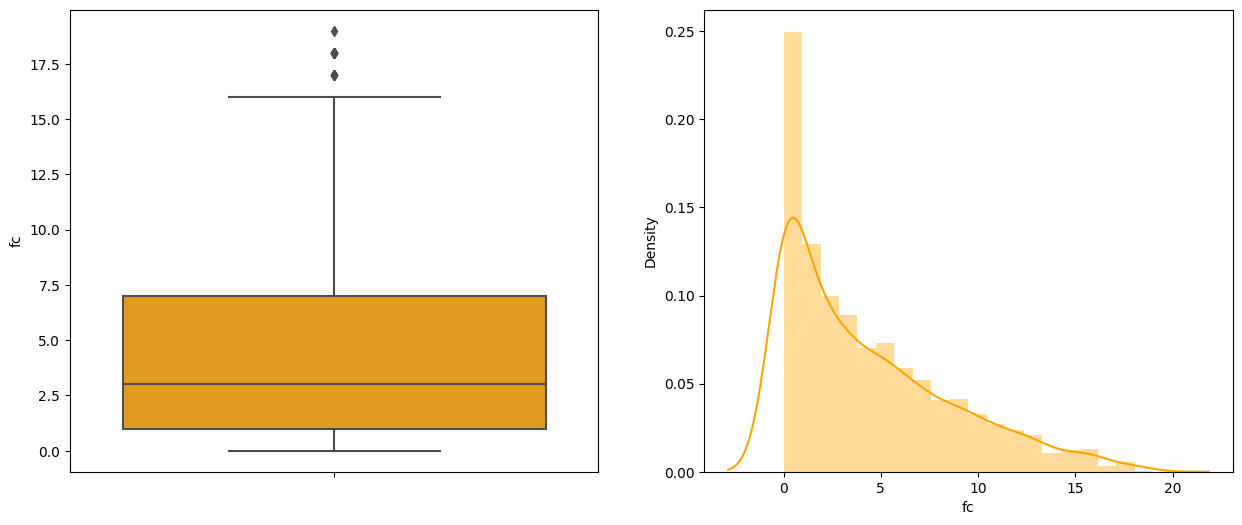

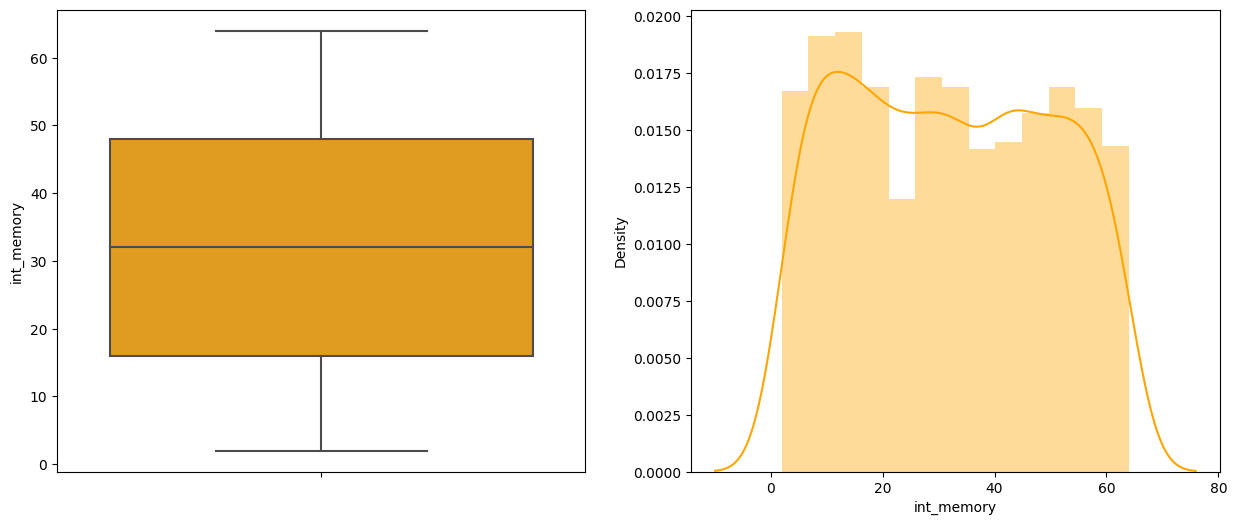

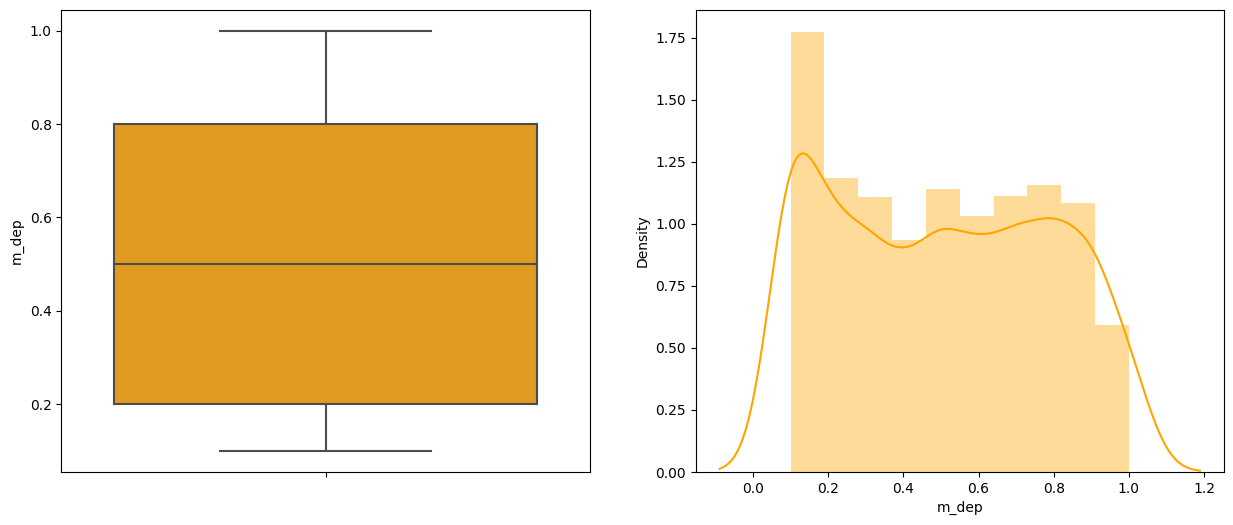

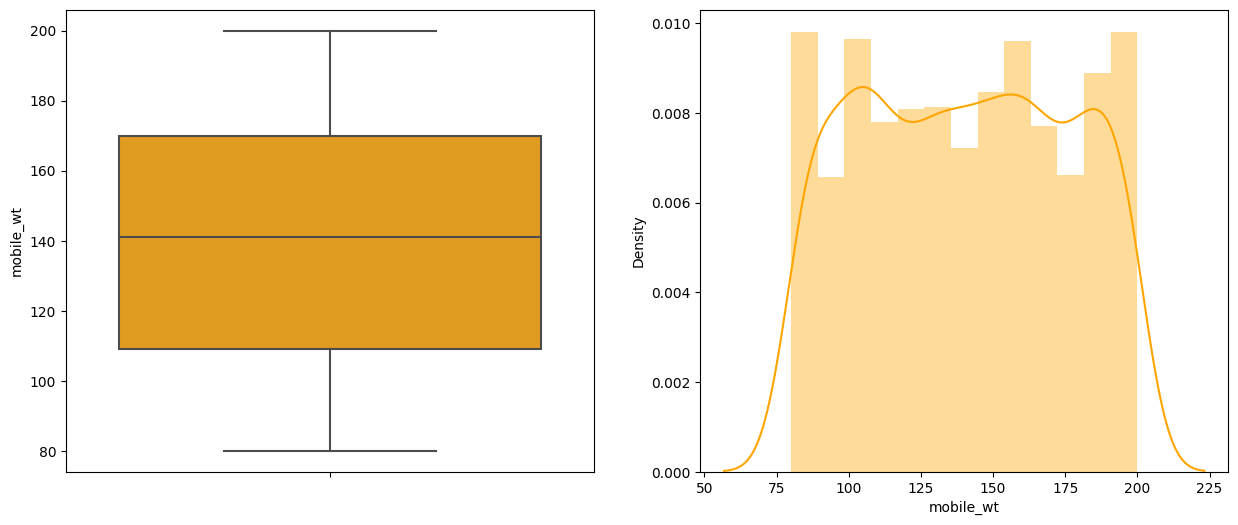

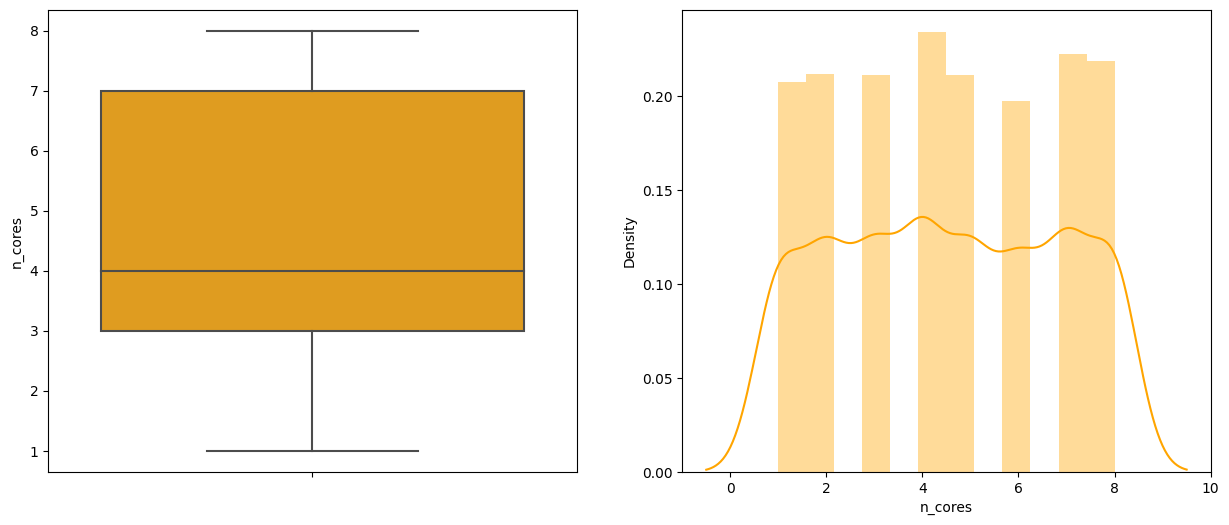

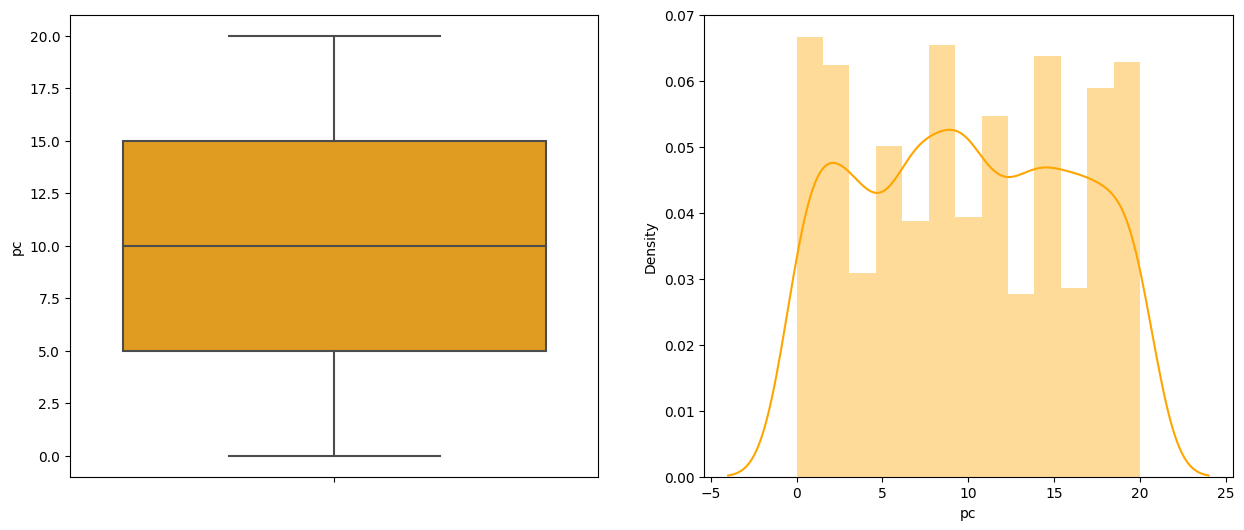

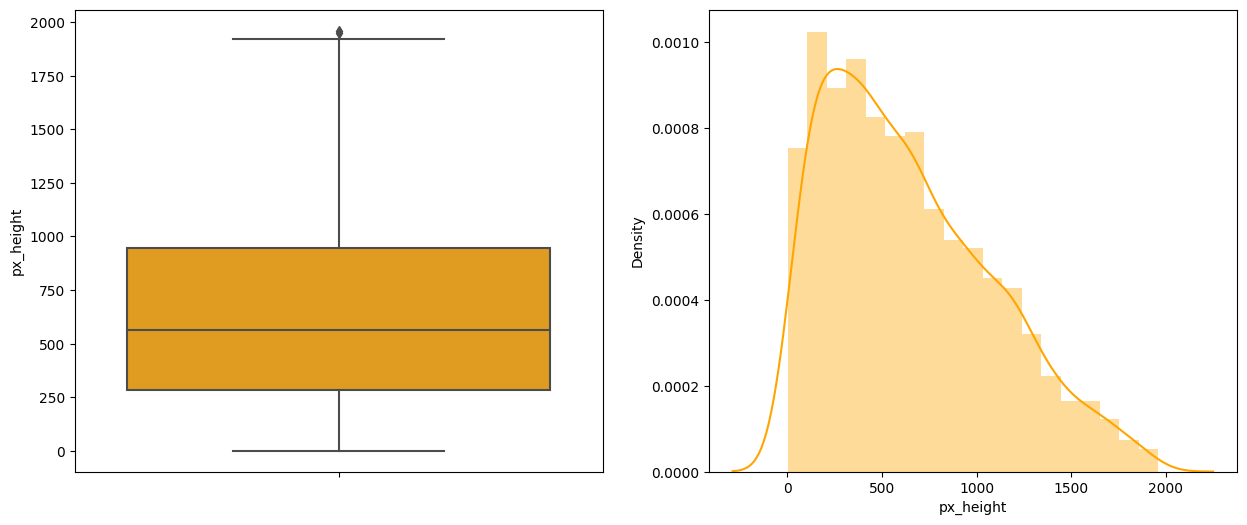

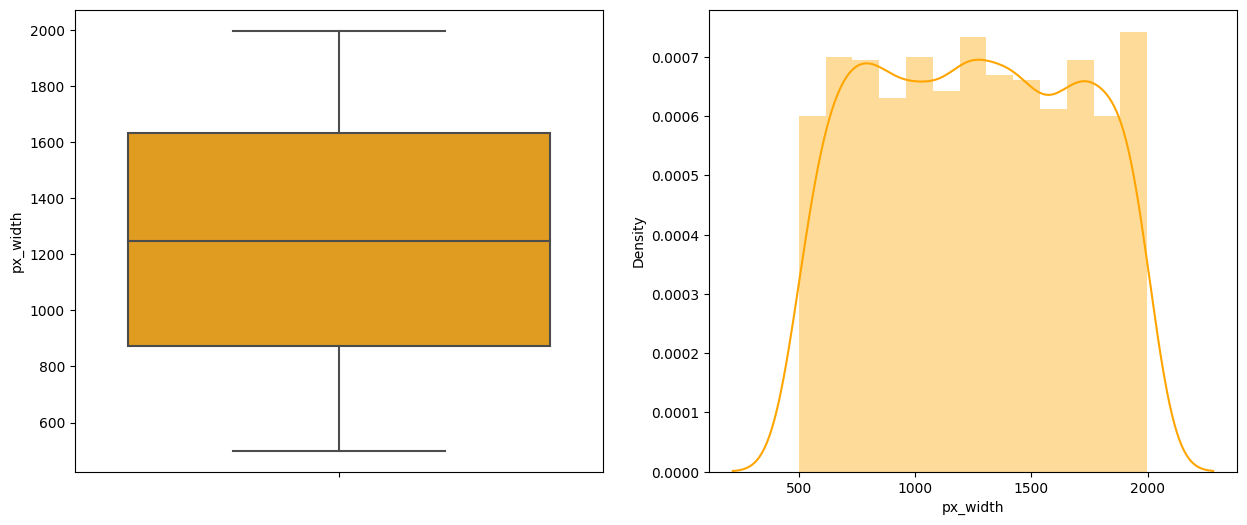

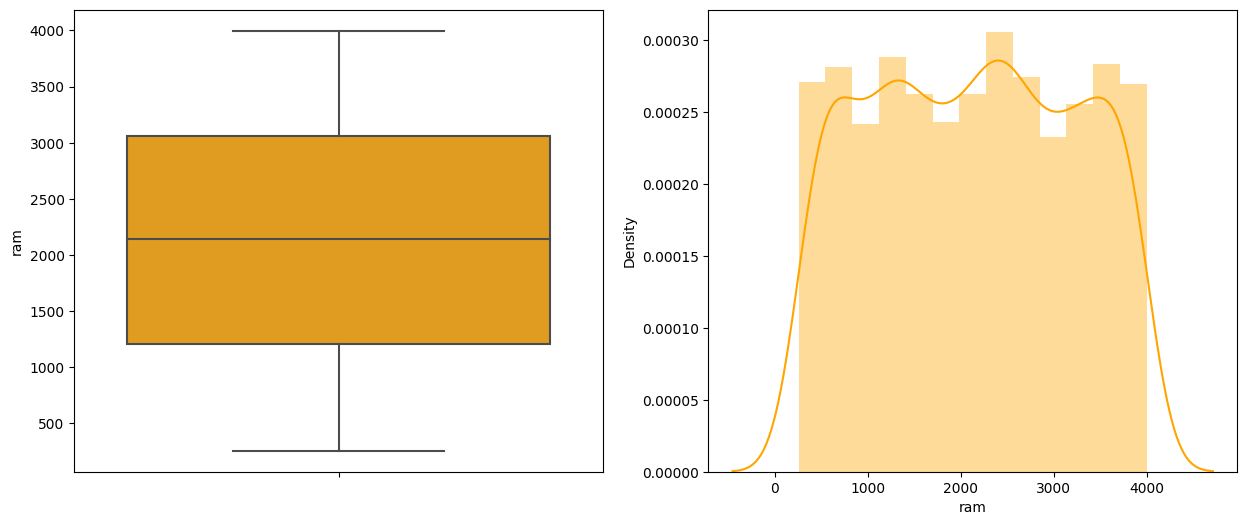

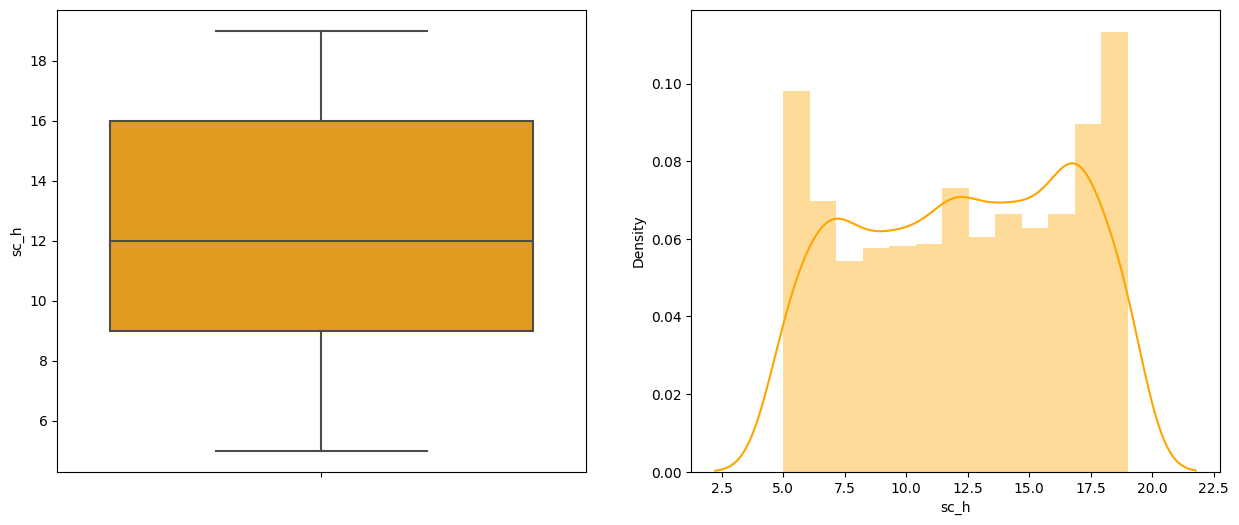

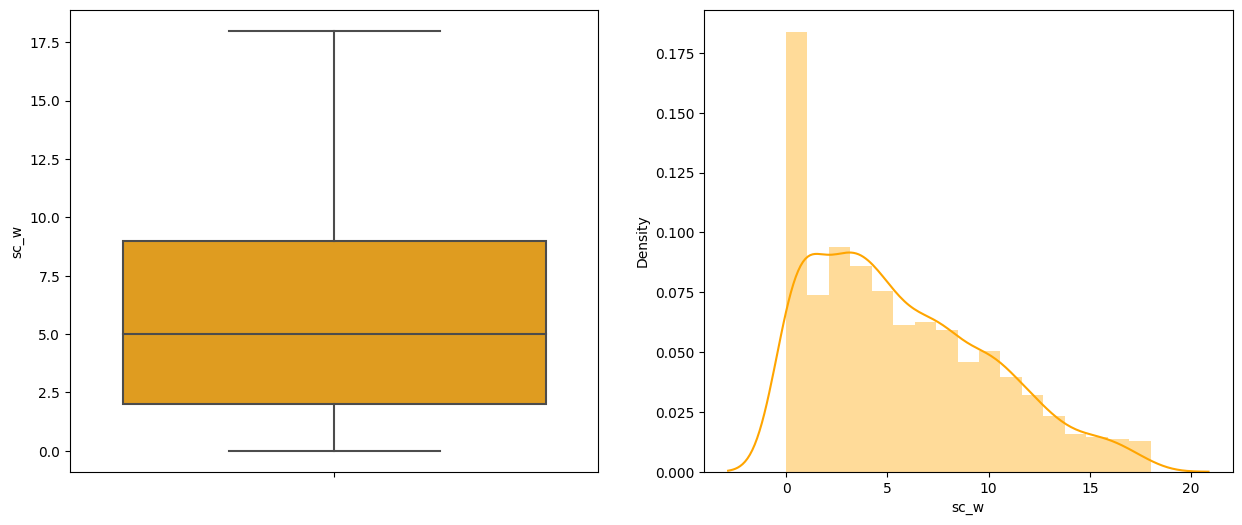

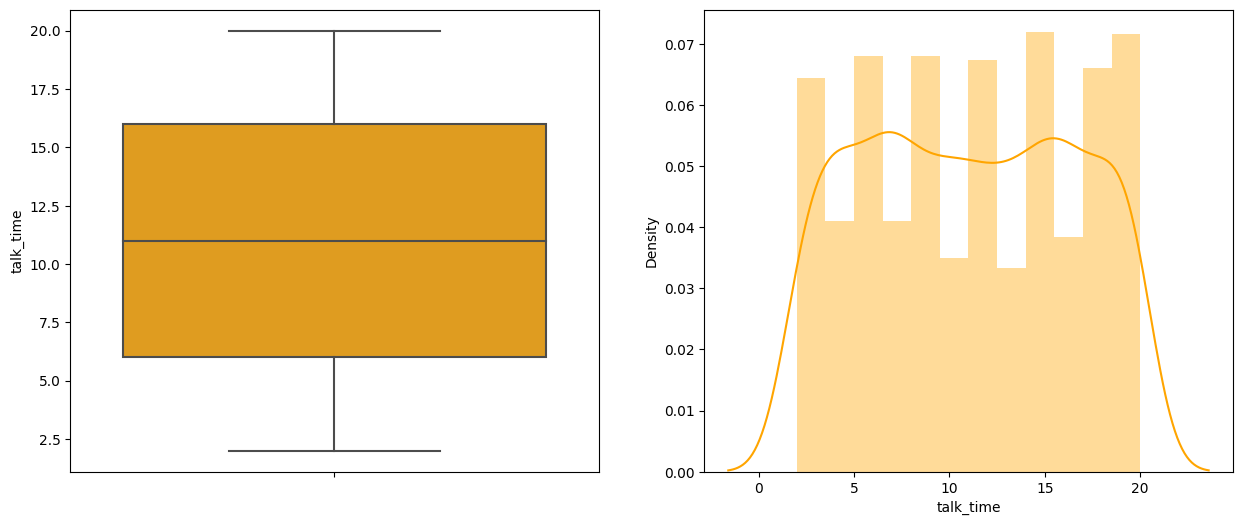

In [33]:
# plotting box plot and distribution of variables along with distant plot to find out outliers .

for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dfc[var],color='orange')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dfc[var],color='orange')
    
    fig.set_xlabel(var)

    plt.show()

## Data is well distributed
## fc and px_height features has some outliers. 

# Operations on Outliers

In [34]:
Q1 = dfc["fc"].quantile(0.25)
Q3 = dfc['fc'].quantile(0.99)
Inter_Quartile_Range = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_df = dfc[(dfc['fc'] <= Q3)]

In [35]:
Q1 = dfc["px_height"].quantile(0.25)
Q3 = dfc['px_height'].quantile(0.99)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_df = dfc[(dfc['px_height'] <= Q3)]

# Final check on outliers.

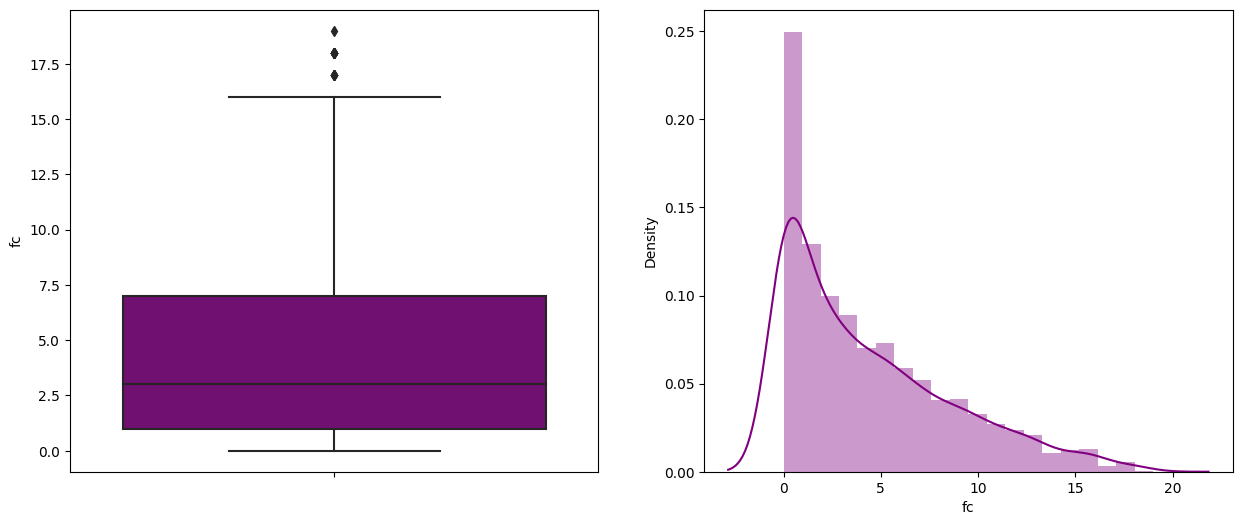

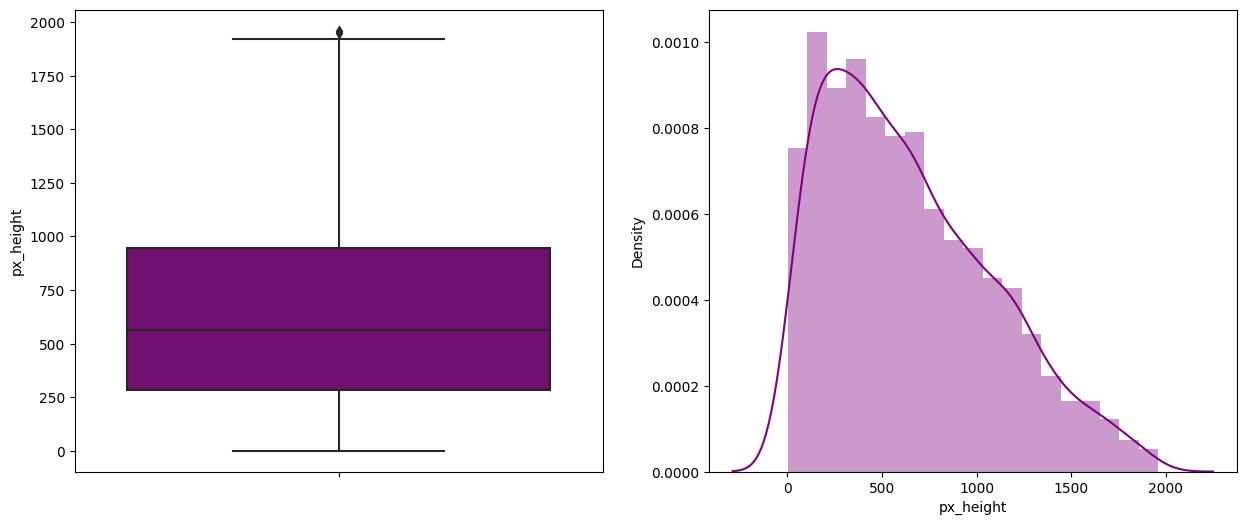

In [36]:
# Visualising whether outliers are removed or not.

for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dfc[var],color='Purple')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dfc[var],color='Purple')
    
    fig.set_xlabel(var)

    plt.show()

In [37]:
dfc.shape

(1998, 21)

## Here we successfully deal with outliers and removed it correctly for further pre-processing.

# **Feature Selection**

## We do not need extra features, as they do not contribute much in the results but do make our algorithms computationally expensive. Hence we will be selecting only the important features.

In [38]:
# Importing the feature selection library from sklearn
# It takes two arrays x and y, and returns a pair of arrays (scores, pvalues)
# The scores represent a measure of how relevant each feature is for the target variable. 

from sklearn.feature_selection import SelectKBest,chi2
# Select features according to 'K' highest scores.

In [39]:
# Making two arrays 'x' & 'y' and assigning them independent and dependent variables

x = mobile_df.iloc[:, :20]
y = mobile_df.iloc[:, 20:]

In [40]:
# Checking the shape 

print(x.shape)
print(y.shape)

(1978, 20)
(1978, 1)


In [41]:
# Feature selection using Chi2 test.
skb = SelectKBest(chi2)
best_scores = skb.fit(x,y)

In [42]:
# finding the best score .
best_scores.scores_

array([1.34866978e+04, 8.53039691e-01, 7.21003533e-01, 6.89737821e-01,
       8.97632230e+00, 1.05518042e+00, 8.59993759e+01, 7.78813388e-01,
       8.75428890e+01, 8.79349231e+00, 7.95958959e+00, 1.61646590e+04,
       9.26991908e+03, 9.24051306e+05, 1.05031965e+01, 1.89291609e+01,
       1.45181877e+01, 3.40779923e-01, 2.21500193e+00, 3.93989348e-01])

In [43]:
# Making a seperate data frame to analyze the best features with respect to columns . 

skb_score = pd.DataFrame(best_scores.scores_)
skb_columns = pd.DataFrame(x.columns)

# Getting the above two columns together through concat function.

list_of_scores = pd.concat([ skb_columns, skb_score], axis = 1)
list_of_scores.columns = ['Features', 'Scores']

list_of_scores

,Features,Scores
0,battery_power,13486.697767
1,blue,0.853040
2,clock_speed,0.721004
3,dual_sim,0.689738
4,fc,8.976322
5,four_g,1.055180
6,int_memory,85.999376
7,m_dep,0.778813
8,mobile_wt,87.542889
9,n_cores,8.793492


## Higher scores indicate that the feature is more important, while lower scores indicate that the feature is less important.

In [44]:
# Now that we have calculated the scores of each feature, we can find the important features to be included.

list_of_scores.nlargest(19, 'Scores')

,Features,Scores
13,ram,924051.306311
11,px_height,16164.659050
0,battery_power,13486.697767
12,px_width,9269.919078
8,mobile_wt,87.542889
6,int_memory,85.999376
15,sc_w,18.929161
16,talk_time,14.518188
14,sc_h,10.503197
4,fc,8.976322


In [45]:
# We will include only the top 14 features, as the scores below those are almost negligible .

list_of_scores.nlargest(14, 'Scores')

,Features,Scores
13,ram,924051.306311
11,px_height,16164.659050
0,battery_power,13486.697767
12,px_width,9269.919078
8,mobile_wt,87.542889
6,int_memory,85.999376
15,sc_w,18.929161
16,talk_time,14.518188
14,sc_h,10.503197
4,fc,8.976322


<Axes: >

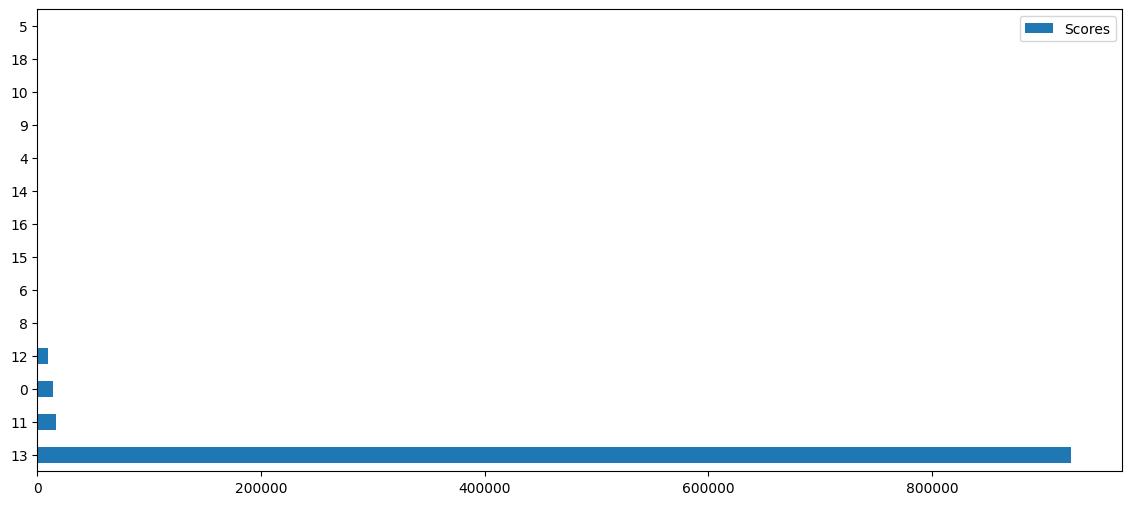

In [46]:
list_of_scores.nlargest(14, 'Scores').plot(kind = 'barh')

### (RAM) This univariate feature selection did not give us clear understanding of important feature.

### Now we will use ExtraTreesClassifier from the sklearn library for Feature Importance Selection.
### This class implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [47]:
 # Reshaping 'y' before fitting the data.

y = y = mobile_df['price_range']

In [48]:
y.shape

(1978,)

In [49]:
# Fitting the data.

ft_imp = ExtraTreesClassifier()
ft_imp.fit(x, y)

ExtraTreesClassifier()

In [50]:
# Below are the Feature importances.

ft_imp.feature_importances_

array([0.06128804, 0.01935372, 0.03206308, 0.01969764, 0.03222471,
       0.01788062, 0.03474685, 0.03401205, 0.03604919, 0.03367044,
       0.03326524, 0.04646508, 0.04880836, 0.3957091 , 0.03368748,
       0.03452771, 0.03471666, 0.01441495, 0.01746451, 0.01995456])

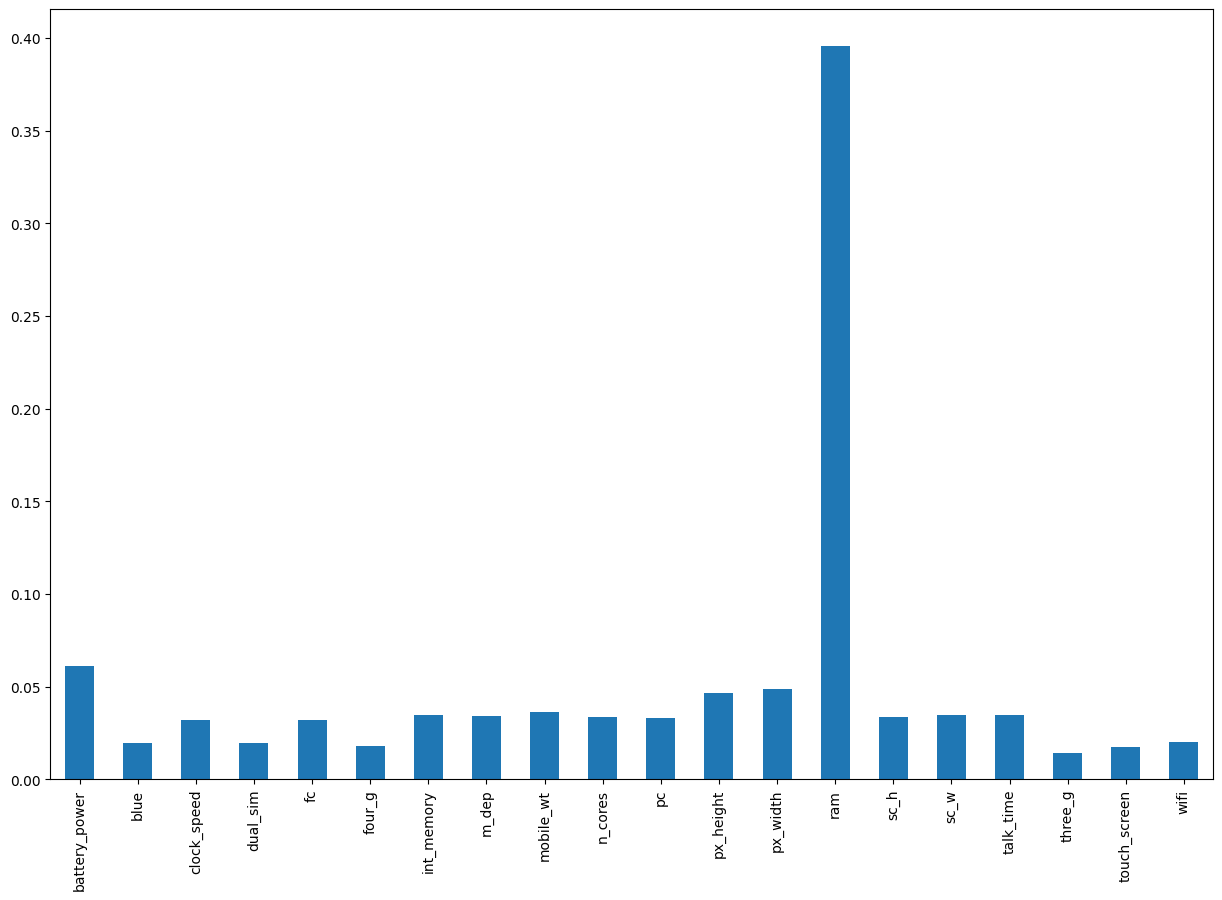

In [51]:
# Plotting the features Importances.

plt.figure(figsize=(15,10))
feature_importance = pd.Series(ft_imp.feature_importances_, index=x.columns)
feature_importance.plot(kind='bar')
plt.show()

## It shows that RAM is the most Influential Feature.

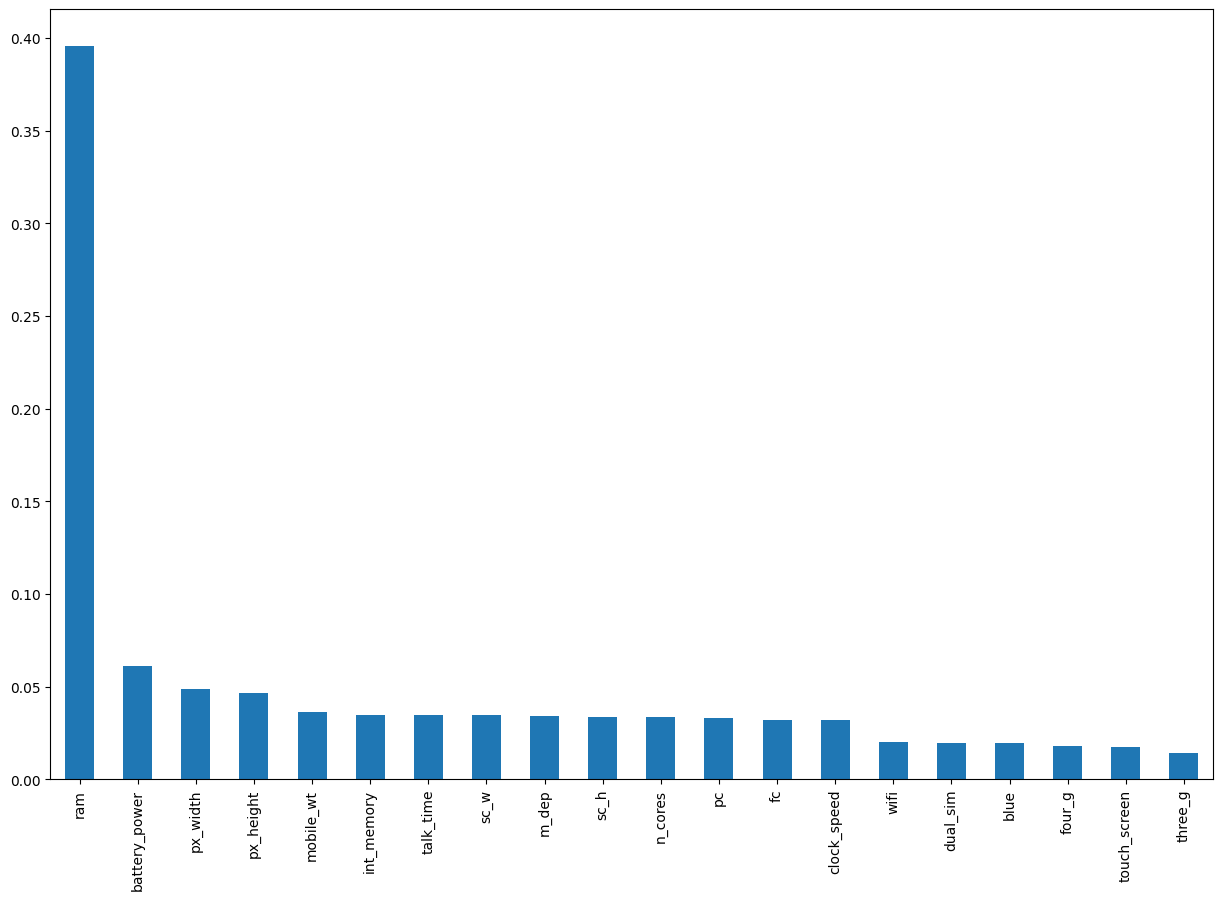

In [52]:
plt.figure(figsize=(15,10))
feature_importance = pd.Series(ft_imp.feature_importances_, index=x.columns)
feature_importance.nlargest(20).plot(kind='bar')
plt.show()

## Here we shows that last 6 features is not much influential,so we can drop this .

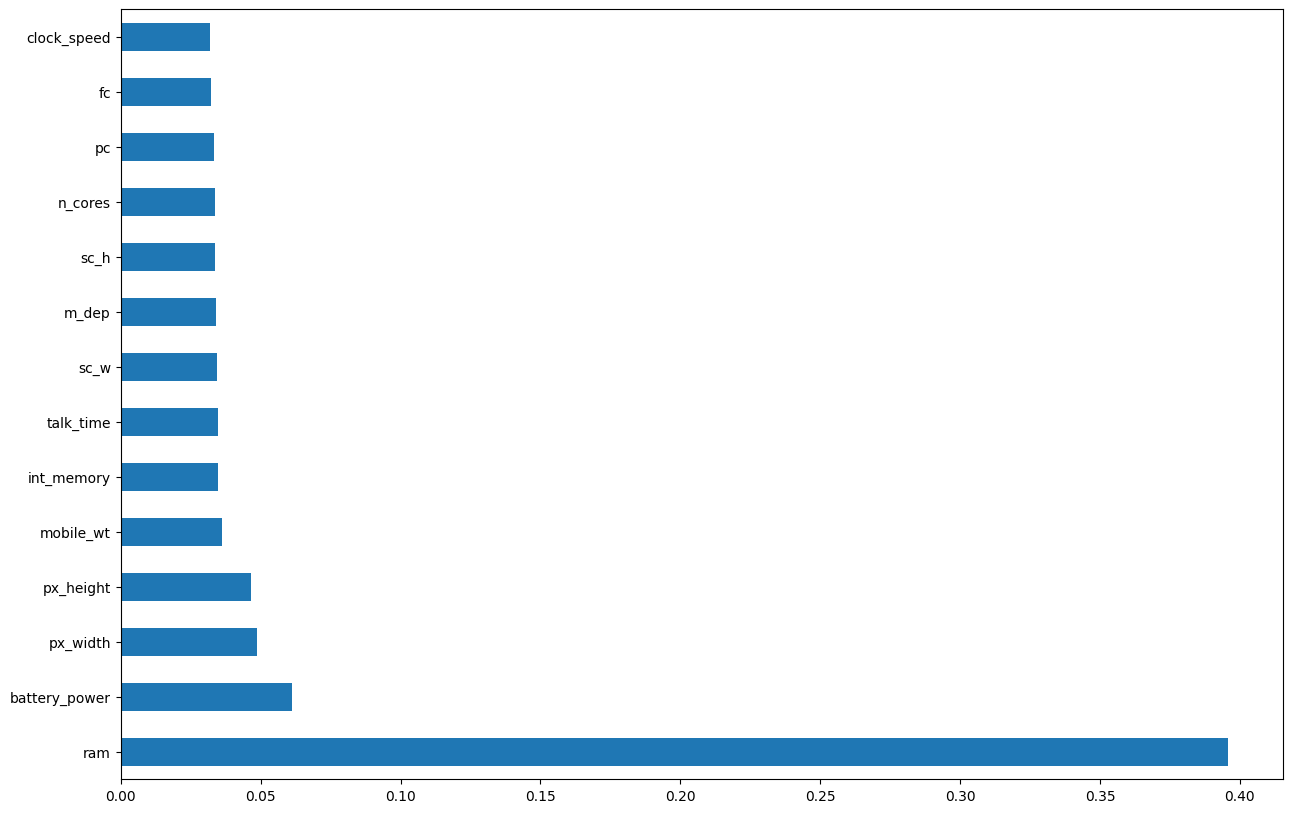

In [53]:
# Plotting the top 14 Important features.

plt.figure(figsize=(15,10))
feature_importance = pd.Series(ft_imp.feature_importances_, index=x.columns)
feature_importance.nlargest(14).plot(kind='barh')
plt.show()

## After Multiple checks we found that the top 14 will be the only features useful to us, we do not need the rest 6 columns and hence will be dropping them from our dataset before applying any model.

In [54]:
# These are the following 6 columns that we do not need.

mobile_df = mobile_df.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], axis = 1)

In [55]:
mobile_df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [56]:
mobile_df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [57]:
mobile_df.shape

(1978, 15)

# **Data Scaling**

## Now we are standardise the data by using standard scaler 

In [58]:
y = mobile_df['price_range'].copy()
mobile_df = mobile_df.drop('price_range',axis=1)

In [59]:
standard_column = list(mobile_df.columns)

In [60]:
# Standard Scaler removes the mean and scales each feature  to unit variance.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mobile_df[standard_column] = scaler.fit_transform(mobile_df[standard_column])

In [61]:
mobile_df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.901427,0.831316,-0.761719,-1.380539,0.342311,1.347013,-1.102888,-1.305519,-1.432352,-1.139525,0.391013,-0.783148,0.286034,1.462366
1,-0.493864,-1.252147,-0.992380,1.156677,0.689181,-0.121469,-0.664833,-0.645755,0.634115,1.735266,0.466608,1.116674,-0.633551,-0.732431
2,-1.536679,-1.252147,-0.531057,0.494794,1.382921,0.132691,0.211276,-0.645755,1.470042,1.100572,0.440795,-0.308193,-0.863448,-0.366632
3,-1.418281,1.198986,-0.992380,-1.215068,1.036051,-0.262670,0.649331,-0.150932,1.360298,1.263912,0.593829,0.879196,0.515930,-0.000832
4,1.327648,-0.394251,2.006217,0.660265,0.342311,0.019731,-1.102888,0.673773,1.341618,-0.075479,-0.658097,-1.020626,-0.863448,0.730767


## Now data has been standardised

In [62]:
X = mobile_df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']].copy()
     

In [63]:
# Shape of data.

print(X.shape)
print(y.shape)

(1978, 14)
(1978,)


## **5. ML Model Implementation**





## Applying Various Classification Model to check Which model is perform best.

# **Train-Test Split**

In [64]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 0) 

print(X_train.shape)
print(X_test.shape) 

(1582, 14)
(396, 14)


In [65]:
y_train.value_counts()

2    412
0    395
1    391
3    384
Name: price_range, dtype: int64

In [66]:
y_test.value_counts()

3    108
0    103
1    103
2     82
Name: price_range, dtype: int64

# **Logistic Regression**


In [67]:
classification = LogisticRegression(fit_intercept=True, max_iter=1000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
# Get the predicted classes

train_class_preds = classification.predict(X_train)
test_class_preds = classification.predict(X_test)

In [69]:
train_class_preds[:10]

array([1, 1, 3, 2, 0, 2, 0, 0, 2, 2])

In [70]:
test_class_preds[:10]

array([0, 0, 2, 1, 2, 2, 2, 3, 1, 1])

## Evaluating metics for Logistic Regression.

# Use of function and methods to create Confusion Matrix.

In [71]:
# Get the accuracy scores.

train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on train data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(train_class_preds, y_train)
cm_test = confusion_matrix(test_class_preds, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the test data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(train_class_preds, y_train)
test_report = classification_report(test_class_preds, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train, classification.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, classification.predict_proba(X_test), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.9747155499367889
The accuracy on train data is : 0.9595959595959596


The confusion matrix on the train data is :

[[391   7   0   0]
 [  4 377  11   0]
 [  0   7 395   5]
 [  0   0   6 379]]

The confusion matrix on the test data is :

[[ 98   3   0   0]
 [  5  99   4   0]
 [  0   1  76   1]
 [  0   0   2 107]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       398
           1       0.96      0.96      0.96       392
           2       0.96      0.97      0.96       407
           3       0.99      0.98      0.99       385

    accuracy                           0.97      1582
   macro avg       0.97      0.97      0.97      1582
weighted avg       0.97      0.97      0.97      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       101
      

In [72]:
def train_confusion_matrix(x):
  
  # Function for plotting train confusion matrix
  
  plt.figure(figsize=(15,10))
  labels = ['0 = Lowcost', '1 = Medium cost', '2 = High cost', '3 = Very high cost']
  ax= plt.subplot()
  sns.heatmap(x, annot=True, ax = ax) 

  # labels, title and ticks
  ax.set_xlabel('Predicted labels', fontsize=30)
  ax.set_ylabel('True labels',fontsize=30)
  ax.set_title('Confusion Matrix',fontsize=30)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

In [73]:
def test_confusion_matrix(x):
  
  # Function for plotting train confusion matrix
  
  plt.figure(figsize=(15,10))
  labels = ['0 = Lowcost', '1 = Medium cost', '2 = High cost', '3 = Very high cost']
  ax= plt.subplot()
  sns.heatmap(x, annot=True, ax = ax) 

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=30)
  ax.set_ylabel('True labels',fontsize=30)
  ax.set_title('Confusion Matrix',fontsize=30)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

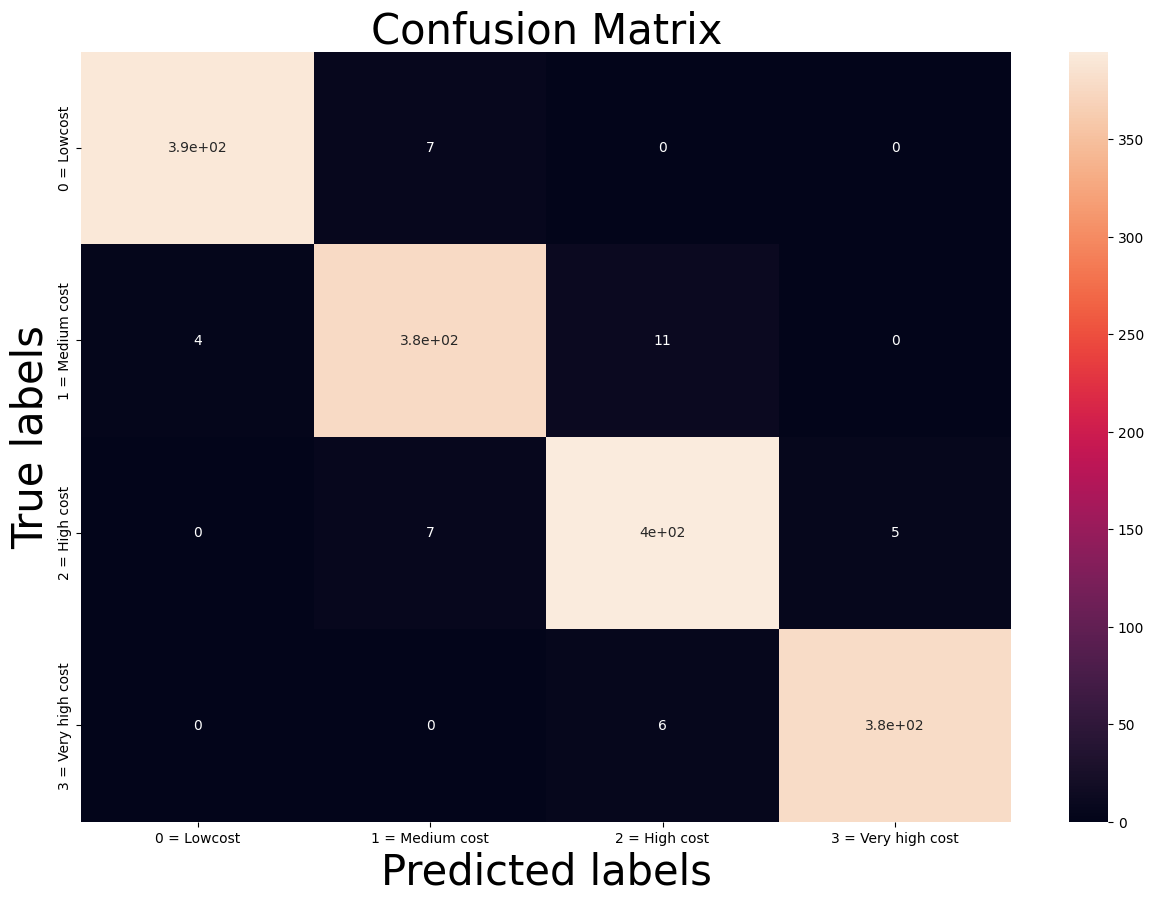

In [74]:
train_confusion_matrix(cm_train)

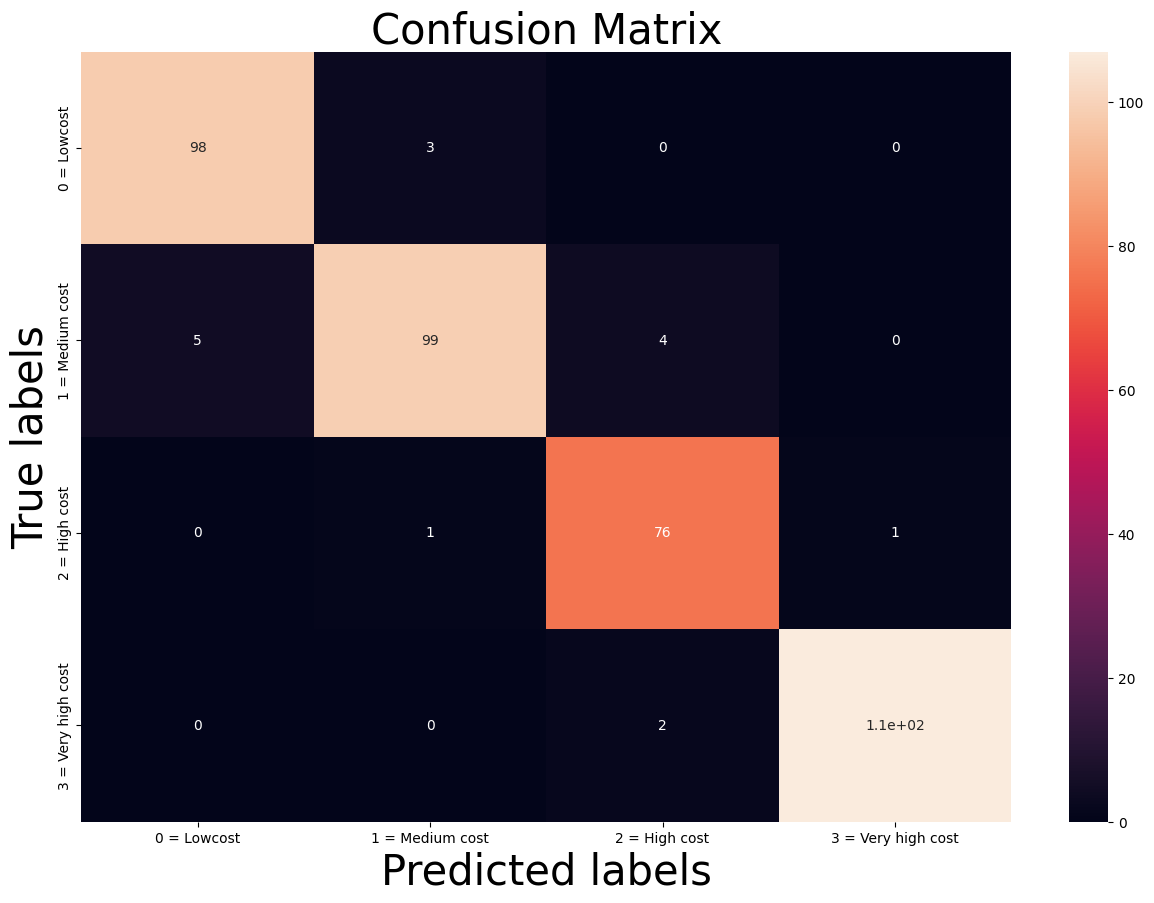

In [75]:
test_confusion_matrix(cm_test)

## **Decision Tree**



In [76]:
Decision_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [77]:
# Get the predicted classes

train_class_preds_Decision_Tree = classification.predict(X_train)
test_class_preds_Decision_Tree = classification.predict(X_test)
     

In [78]:
train_class_preds_Decision_Tree[:20]


array([1, 1, 3, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 3, 0, 2, 3, 3, 2, 0])

In [79]:
test_class_preds_Decision_Tree[:20]

array([0, 0, 2, 1, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 0, 2, 3, 3, 2])

# Visualizing Decision Tree

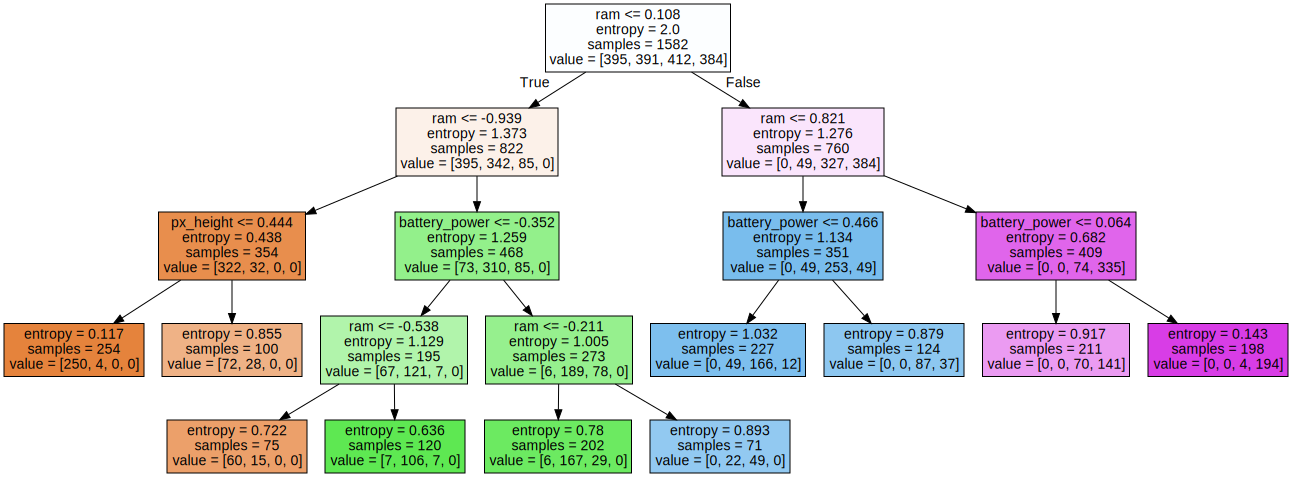

In [80]:
graph = Source(tree.export_graphviz(Decision_classifier, out_file=None
   , feature_names=X_train.columns,filled = True))
display(SVG(graph.pipe(format='svg')))

# Evaluation metrics for Decision Tree

In [81]:
# Get the accuracy scores

train_accuracy = accuracy_score(train_class_preds_Decision_Tree,y_train)
test_accuracy = accuracy_score(test_class_preds_Decision_Tree,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(train_class_preds_Decision_Tree, y_train)
cm_test = confusion_matrix(test_class_preds_Decision_Tree, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the test data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(train_class_preds_Decision_Tree, y_train)
test_report = classification_report(test_class_preds_Decision_Tree, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train, Decision_classifier.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, Decision_classifier.predict_proba(X_test), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.9747155499367889
The accuracy on test data is : 0.9595959595959596


The confusion matrix on the train data is :

[[391   7   0   0]
 [  4 377  11   0]
 [  0   7 395   5]
 [  0   0   6 379]]

The confusion matrix on the test data is :

[[ 98   3   0   0]
 [  5  99   4   0]
 [  0   1  76   1]
 [  0   0   2 107]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       398
           1       0.96      0.96      0.96       392
           2       0.96      0.97      0.96       407
           3       0.99      0.98      0.99       385

    accuracy                           0.97      1582
   macro avg       0.97      0.97      0.97      1582
weighted avg       0.97      0.97      0.97      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       101
       

## We get same results of accuracy score,confusion matrix and for classification report.
## so we need to do cross validation and hyperparameter tuning for evaluate the performance of model.

# **Cross validation and Hyperparameter tuning for Decision Tree Model.**


In [82]:
# Defining parameter for model.

parameters={"max_depth" : [1,5,12,19,26,33,41,49,55,61,69,78,85,92,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[10,20,30,40,50,70,100,140,150]}

In [83]:
class_decision_model = DecisionTreeClassifier()
tuning_Decision_classifier = GridSearchCV(class_decision_model,param_grid=parameters,cv=7)
tuning_Decision_classifier.fit(X_train, y_train)
     

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 12, 19, 26, 33, 41, 49, 55, 61, 69,
                                       78, 85, 92, 100],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 70, 100, 140,
                                            150],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 40, 60,
                                              80, 100]})

In [84]:
# gettting best hyperparameter.

tuning_Decision_classifier.best_params_

{'max_depth': 100, 'max_leaf_nodes': 150, 'min_samples_leaf': 4}

In [85]:
# prediction on train and test data

tune_y_train_pred = tuning_Decision_classifier.predict(X_train)
tune_y_test_pred = tuning_Decision_classifier.predict(X_test)

# Evaluation matrix for decision tree by using Grid search Cross Validation and hyperparameter`


In [86]:
# Get the accuracy scores

train_accuracy = accuracy_score(tune_y_train_pred,y_train)
test_accuracy = accuracy_score(tune_y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(tune_y_train_pred, y_train)
cm_test = confusion_matrix(tune_y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(tune_y_train_pred, y_train)
test_report = classification_report(tune_y_test_pred, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train, tuning_Decision_classifier.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, tuning_Decision_classifier.predict_proba(X_test), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.9506953223767383
The accuracy on test data is : 0.8484848484848485


The confusion matrix on the train data is :

[[389  14   0   0]
 [  6 364  15   0]
 [  0  13 385  18]
 [  0   0  12 366]]

The confusion matrix on the train data is :

[[89 12  0  0]
 [14 86 11  0]
 [ 0  5 67 14]
 [ 0  0  4 94]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       403
           1       0.93      0.95      0.94       385
           2       0.93      0.93      0.93       416
           3       0.95      0.97      0.96       378

    accuracy                           0.95      1582
   macro avg       0.95      0.95      0.95      1582
weighted avg       0.95      0.95      0.95      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       101
           1       0.8

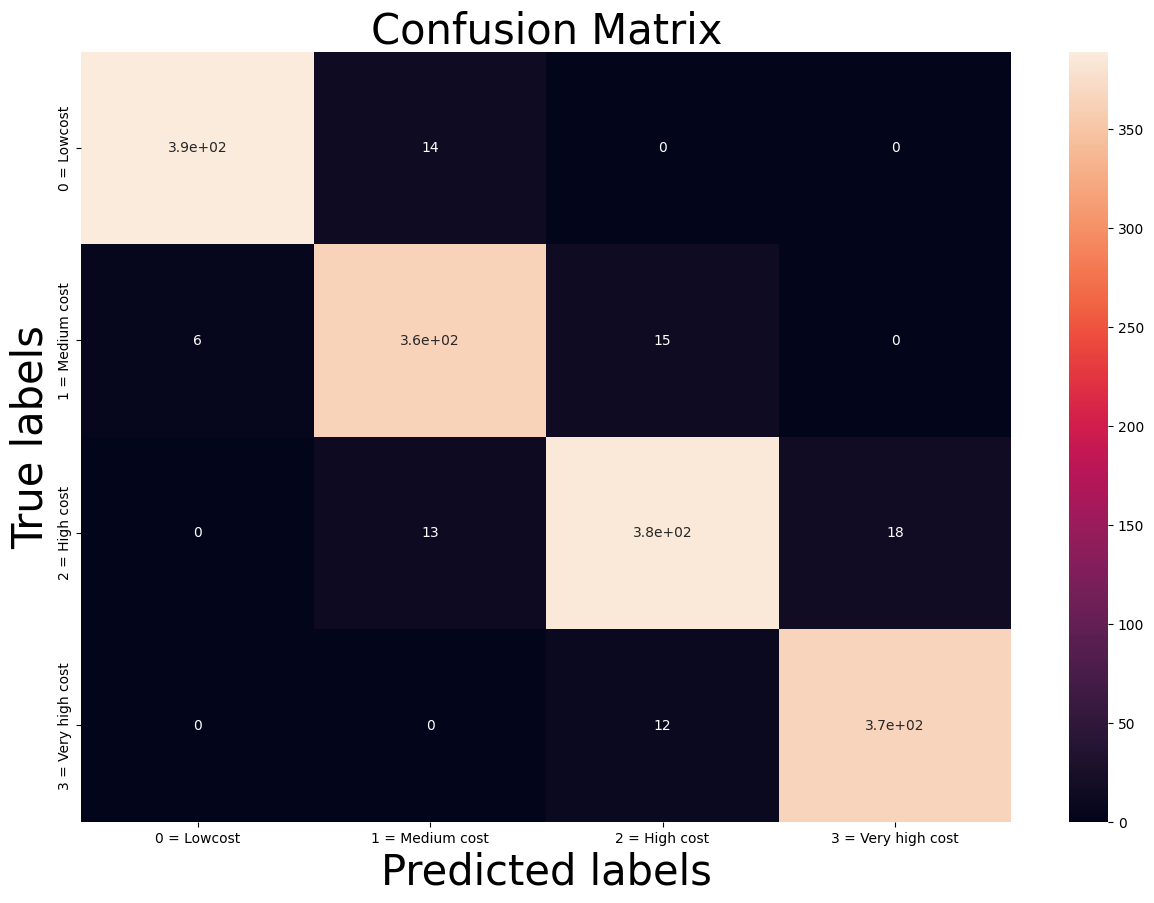

In [87]:
# Train Matrix

train_confusion_matrix(cm_train)

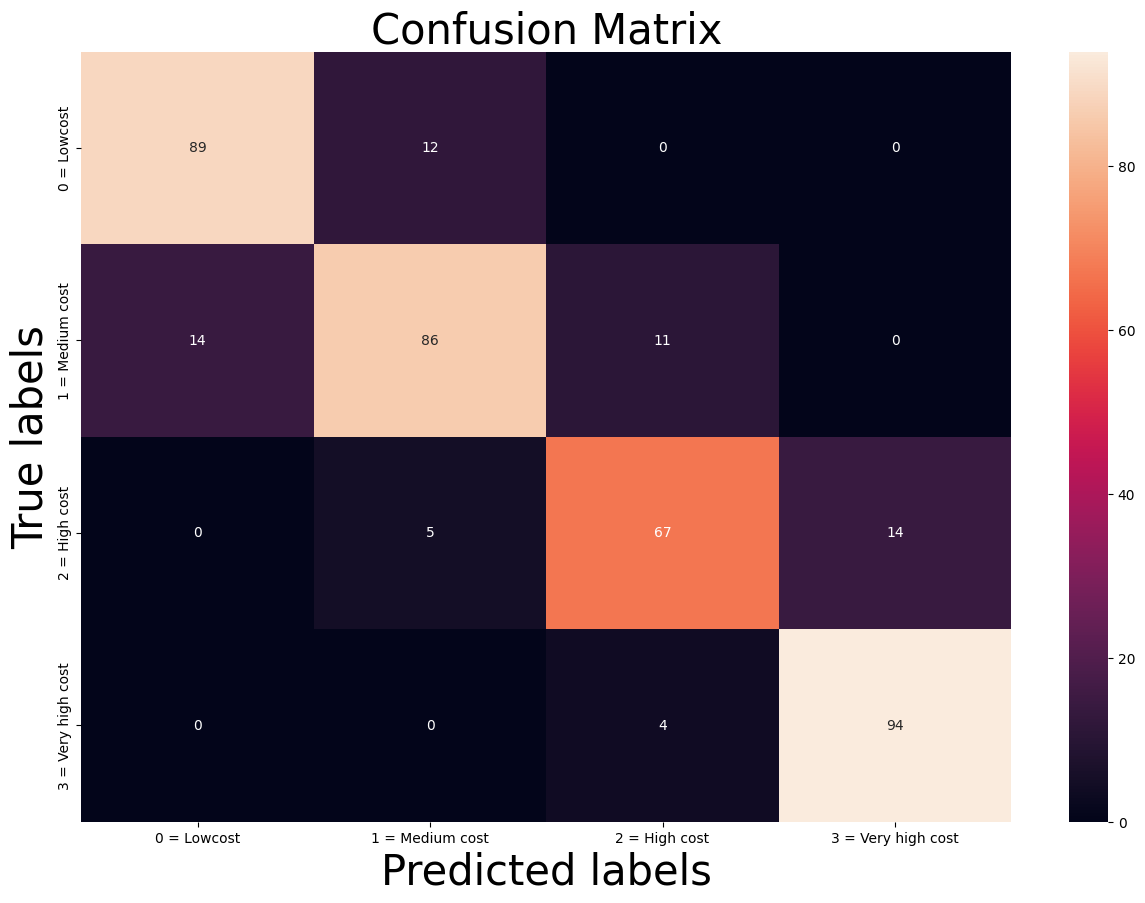

In [88]:
# Test Matrix

test_confusion_matrix(cm_test)

# **Random Forest**



In [89]:
# Fitting data to model


rfc = RandomForestClassifier(n_estimators = 80, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

In [90]:
#prediction on train and test data

random_forest_y_train_pred=rfc.predict(X_train)
random_forest_y_test_pred=rfc.predict(X_test)

# Evaluation matrix

In [91]:
# Get the accuracy scores

train_accuracy = accuracy_score(random_forest_y_train_pred,y_train)
test_accuracy = accuracy_score(random_forest_y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(random_forest_y_train_pred, y_train)
cm_test = confusion_matrix(random_forest_y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(random_forest_y_train_pred, y_train)
test_report = classification_report(random_forest_y_test_pred, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train, rfc.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 1.0
The accuracy on test data is : 0.8762626262626263


The confusion matrix on the train data is :

[[395   0   0   0]
 [  0 391   0   0]
 [  0   0 412   0]
 [  0   0   0 384]]

The confusion matrix on the train data is :

[[93 10  0  0]
 [10 86  8  0]
 [ 0  7 69  9]
 [ 0  0  5 99]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       412
           3       1.00      1.00      1.00       384

    accuracy                           1.00      1582
   macro avg       1.00      1.00      1.00      1582
weighted avg       1.00      1.00      1.00      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       103
           1       0.83      0.83    

#  hyperparameter tune for Random Forest Model.

In [92]:
# para_grid values to pass in gridsearchcv.

grid_values={'n_estimators':[10, 20, 30, 40],
          'max_depth':[ 3, 5, 7],
          'min_samples_split':[2,4,6],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']

           }

In [93]:
# creating the instance.

rfc_= RandomForestClassifier(random_state=0)

In [94]:
# Applying GridSearchCV.

rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.713 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.769 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.771 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.706 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.704 total time=   0.1s
[CV 1/3

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy', verbose=3)

In [95]:
# Getting best paramters for the models.

rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 40}

In [96]:
# training the data with best parameters.

rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=6, n_estimators=700, random_state=0)

In [97]:
# predicting y values of train and test set.

random_y_train_pred=rfc_optimal.predict(X_train)
random_y_test_pred=rfc_optimal.predict(X_test)

In [98]:
# Get the accuracy scores

train_accuracy = accuracy_score(random_y_train_pred,y_train)
test_accuracy = accuracy_score(random_y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(random_y_train_pred, y_train)
cm_test = confusion_matrix(random_y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(random_y_train_pred, y_train)
test_report = classification_report(random_y_test_pred, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train, rfc.predict_proba(X_train), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 1.0
The accuracy on test data is : 0.8914141414141414


The confusion matrix on the train data is :

[[395   0   0   0]
 [  0 391   0   0]
 [  0   0 412   0]
 [  0   0   0 384]]

The confusion matrix on the train data is :

[[95 10  0  0]
 [ 8 85  6  0]
 [ 0  8 74  9]
 [ 0  0  2 99]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       412
           3       1.00      1.00      1.00       384

    accuracy                           1.00      1582
   macro avg       1.00      1.00      1.00      1582
weighted avg       1.00      1.00      1.00      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.83      0.86    

# **Observations of Random Forest**:

# Before Tuning

## training accuarcy = 100%
## test accuarcy = 88% 
## Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

# After tuning: 

## Training accuarcy= 100%

## Test accuarcy = 90%

## we have slightly improved the model and overfitting is reduced slightly.

# **Distance Based Algorithms**

##  For knn and svm model require to scaled the feature because they are distance based algorithms

In [99]:
# Scale the x train and x test.

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   
X_test_scaled=scaler.transform(X_test)         

In [100]:
X_train_scaled

array([[-1.18639501,  1.43948314, -0.98356955, ..., -1.52259139,
        -0.18368007, -0.72833082],
       [ 0.71187791,  1.56262499,  1.32299289, ..., -0.0805202 ,
        -1.1003421 , -0.72833082],
       [ 1.58467327,  1.31634128, -0.98356955, ..., -0.56121059,
         0.73298197,  0.91978968],
       ...,
       [ 0.34270599, -0.03821912,  0.40036792, ..., -0.3208654 ,
        -0.41284557,  1.28603869],
       [-0.13357137, -0.40764469, -0.06094457, ..., -1.52259139,
        -0.41284557, -0.54520632],
       [ 0.58654177,  1.31634128,  0.63102416, ...,  0.159825  ,
        -1.1003421 ,  0.73666518]])

In [101]:
X_test_scaled

array([[-0.1700328 , -0.40764469, -0.98356955, ..., -1.76293658,
        -0.64201108, -0.72833082],
       [ 0.15356235, -0.77707025, -0.98356955, ..., -1.28224619,
        -1.1003421 , -1.27770432],
       [-0.03558129, -1.26963767, -0.98356955, ..., -0.0805202 ,
        -0.64201108, -0.36208182],
       ...,
       [-1.50315364,  1.19319943, -0.98356955, ...,  1.12120579,
         0.27465095, -1.27770432],
       [ 0.29712921, -1.26963767, -0.7529133 , ...,  0.88086059,
         0.50381646, -1.27770432],
       [ 0.88506968,  1.07005757,  0.8616804 , ..., -1.76293658,
        -0.64201108, -0.72833082]])

# **KNN model Implementation**

KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation

In [102]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train_scaled,y_train)

# Predict the test set

y_train_pred = kn.predict(X_train_scaled)

y_test_pred = kn.predict(X_test_scaled)

# Evaluation matrix

In [103]:
# Get the accuracy scores

train_accuracy = accuracy_score(y_train_pred,y_train)
test_accuracy = accuracy_score(y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(y_train_pred, y_train)
test_report = classification_report(y_test_pred, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train,  kn.predict_proba(X_train_scaled), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test,  kn.predict_proba(X_test_scaled), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.7225031605562579
The accuracy on test data is : 0.6186868686868687


The confusion matrix on the train data is :

[[342  99   6   1]
 [ 51 231  91   7]
 [  2  60 292  98]
 [  0   1  23 278]]

The confusion matrix on the train data is :

[[75 34  3  0]
 [27 45 22  1]
 [ 1 24 51 33]
 [ 0  0  6 74]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       448
           1       0.59      0.61      0.60       380
           2       0.71      0.65      0.68       452
           3       0.72      0.92      0.81       302

    accuracy                           0.72      1582
   macro avg       0.72      0.73      0.72      1582
weighted avg       0.73      0.72      0.72      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       112
           1       0.4

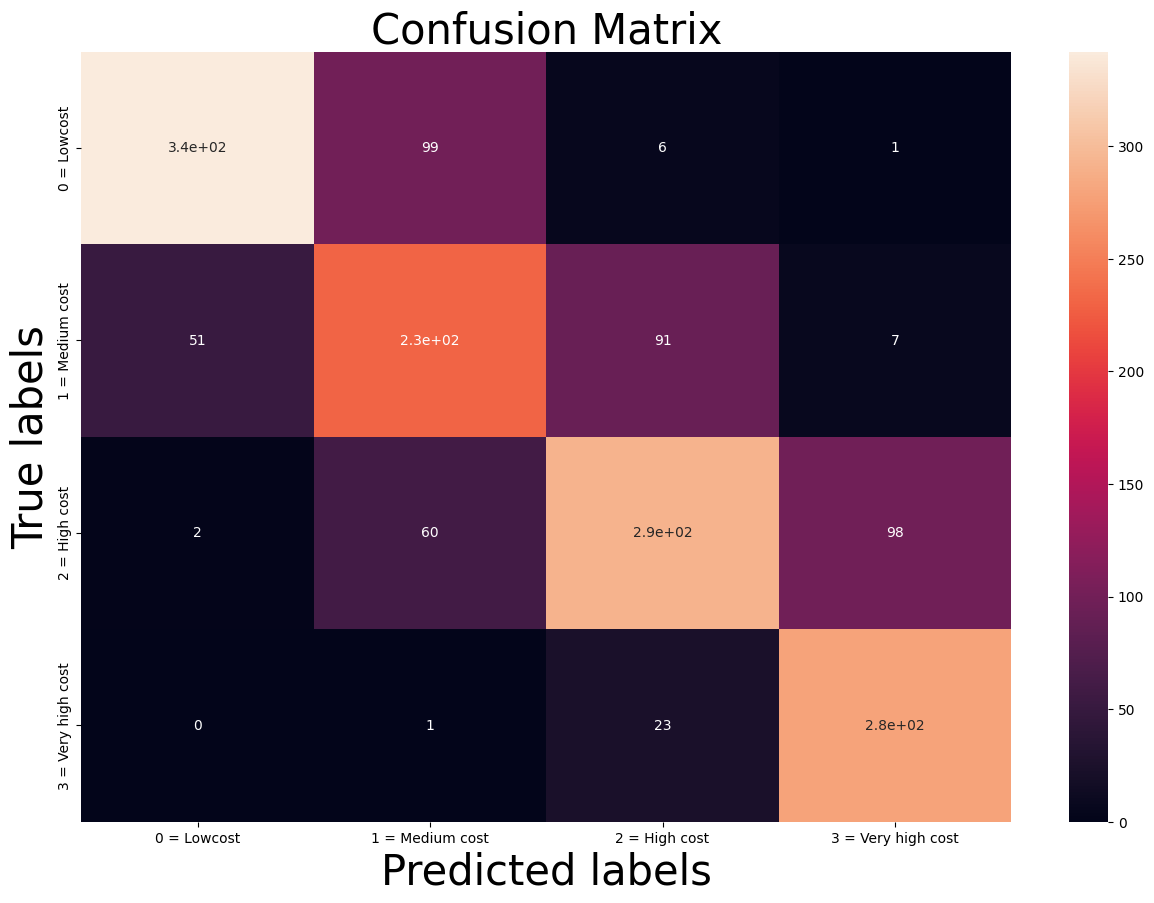

In [104]:
 # Train Matrix

train_confusion_matrix(cm_train)

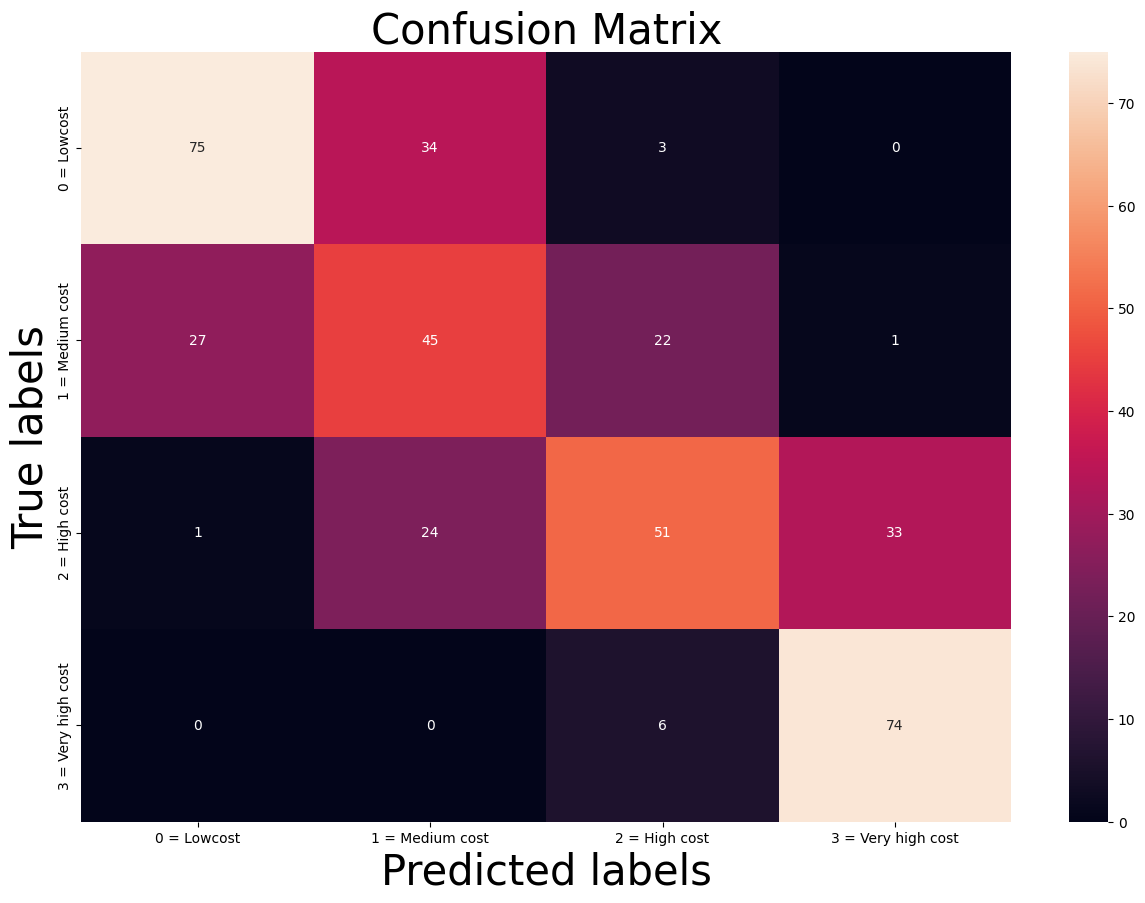

In [105]:
# Test matrix

test_confusion_matrix(cm_test)

# Hyperparameter tuning for knn model

In [106]:
# creating an object of classifier.

knn=KNeighborsClassifier()

In [107]:
# parameter grid values.

grid_values = {'n_neighbors':list(range(1,20))}

In [108]:
# applying GridSearchCv with above grid values and cv=7

knn_tune=GridSearchCV(knn,cv=7,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)
     

Fitting 7 folds for each of 19 candidates, totalling 133 fits
[CV 1/7] END .....................n_neighbors=1;, score=0.558 total time=   0.0s
[CV 2/7] END .....................n_neighbors=1;, score=0.487 total time=   0.0s
[CV 3/7] END .....................n_neighbors=1;, score=0.535 total time=   0.0s
[CV 4/7] END .....................n_neighbors=1;, score=0.513 total time=   0.0s
[CV 5/7] END .....................n_neighbors=1;, score=0.518 total time=   0.0s
[CV 6/7] END .....................n_neighbors=1;, score=0.522 total time=   0.0s
[CV 7/7] END .....................n_neighbors=1;, score=0.518 total time=   0.0s
[CV 1/7] END .....................n_neighbors=2;, score=0.558 total time=   0.0s
[CV 2/7] END .....................n_neighbors=2;, score=0.482 total time=   0.0s
[CV 3/7] END .....................n_neighbors=2;, score=0.549 total time=   0.0s
[CV 4/7] END .....................n_neighbors=2;, score=0.504 total time=   0.0s
[CV 5/7] END .....................n_neighbors=2

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=3)

In [109]:
# getting thge best parameters.

knn_tune.best_params_    

{'n_neighbors': 19}

In [110]:
# fitting the data with best parameters.

knn_optimal=KNeighborsClassifier(n_neighbors=8)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [111]:
# predicting y values of train and test set.

y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [112]:
# Get the accuracy scores

train_accuracy = accuracy_score(y_train_pred,y_train)
test_accuracy = accuracy_score(y_test_pred,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_test_pred, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(y_train_pred, y_train)
test_report = classification_report(y_test_pred, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train,  kn.predict_proba(X_train_scaled), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test,  kn.predict_proba(X_test_scaled), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.7408343868520859
The accuracy on test data is : 0.6186868686868687


The confusion matrix on the train data is :

[[353  89   9   1]
 [ 41 239  81  11]
 [  1  60 299  91]
 [  0   3  23 281]]

The confusion matrix on the train data is :

[[75 34  3  0]
 [27 45 22  1]
 [ 1 24 51 33]
 [ 0  0  6 74]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       452
           1       0.61      0.64      0.63       372
           2       0.73      0.66      0.69       451
           3       0.73      0.92      0.81       307

    accuracy                           0.74      1582
   macro avg       0.74      0.75      0.74      1582
weighted avg       0.75      0.74      0.74      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       112
           1       0.4

## KNN algorithm needs to calculate the distances between all data points and the test point for each prediction, which can be time-consuming when working with a large number of data points it is not give even good result because it is distance basis algorithm however for large dataset we can use this by using principal component analysis using dimesional reduction techniques which causes more loss of data .

## KNN is lazy learner model due to that using hyperparameter and cross validation tuning this model not give at least good result.
















## **support vector machine Implementation**

In [113]:
# Importing Required files and implementing .

from sklearn import svm
svm_classifier = svm.SVC(probability=True)

In [114]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(probability=True)

In [115]:
svm_y_pred_train = svm_classifier.predict(X_train_scaled) 

svm_y_pred_test = svm_classifier.predict(X_test_scaled)


# Evaluation matrix

In [116]:
train_accuracy = accuracy_score(svm_y_pred_train,y_train)
test_accuracy = accuracy_score(svm_y_pred_test,y_test)

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is :", test_accuracy)
print('')
print('')

cm_train = confusion_matrix(svm_y_pred_train, y_train)
cm_test = confusion_matrix(svm_y_pred_test, y_test)

print("The confusion matrix on the train data is :")
print('')
print(cm_train)
print('')
print("The confusion matrix on the train data is :")
print('')
print(cm_test)
print('')
print('')

train_report = classification_report(svm_y_pred_train, y_train)
test_report = classification_report(svm_y_pred_test, y_test)

print("The classification report on the train data is :")
print('')
print(train_report)
print('')
print("The classification report on the test data is :")
print('')
print(test_report)
print('')
print('')

train_roc_auc_score = roc_auc_score(y_train, svm_classifier.predict_proba(X_train_scaled), multi_class='ovr')
test_roc_auc_score = roc_auc_score(y_test, svm_classifier.predict_proba(X_test_scaled), multi_class='ovr')

print("The ROC AUC score on the train data is: ", train_roc_auc_score)
print("The ROC AUC score on the test data is: ", test_roc_auc_score)

The accuracy on train data is : 0.9835651074589128
The accuracy on test data is : 0.898989898989899


The confusion matrix on the train data is :

[[392   3   0   0]
 [  3 383  10   0]
 [  0   5 401   4]
 [  0   0   1 380]]

The confusion matrix on the train data is :

[[ 94   8   0   0]
 [  9  86   5   0]
 [  0   9  74   6]
 [  0   0   3 102]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.98      0.97      0.97       396
           2       0.97      0.98      0.98       410
           3       0.99      1.00      0.99       381

    accuracy                           0.98      1582
   macro avg       0.98      0.98      0.98      1582
weighted avg       0.98      0.98      0.98      1582


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       102
       

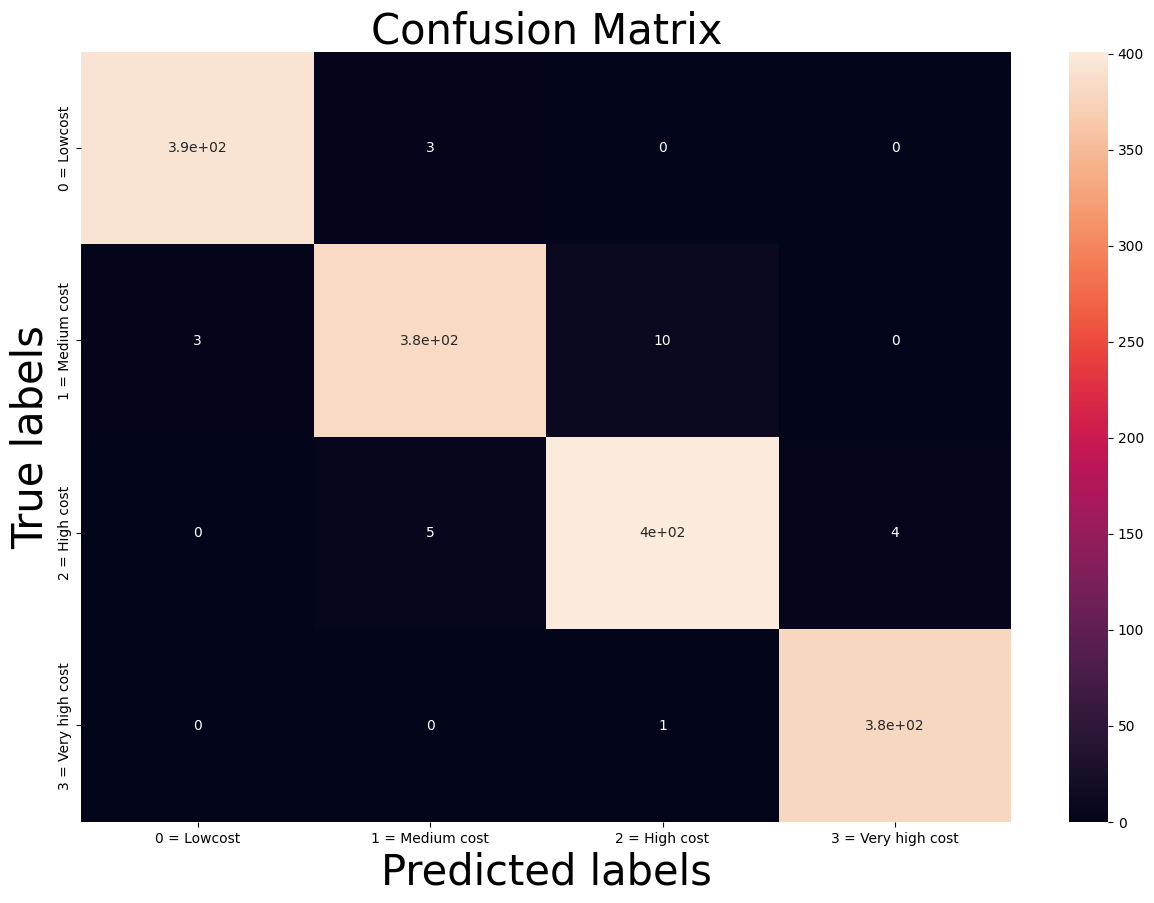

In [117]:
# Plotting the train confusion matrix

train_confusion_matrix(cm_train)

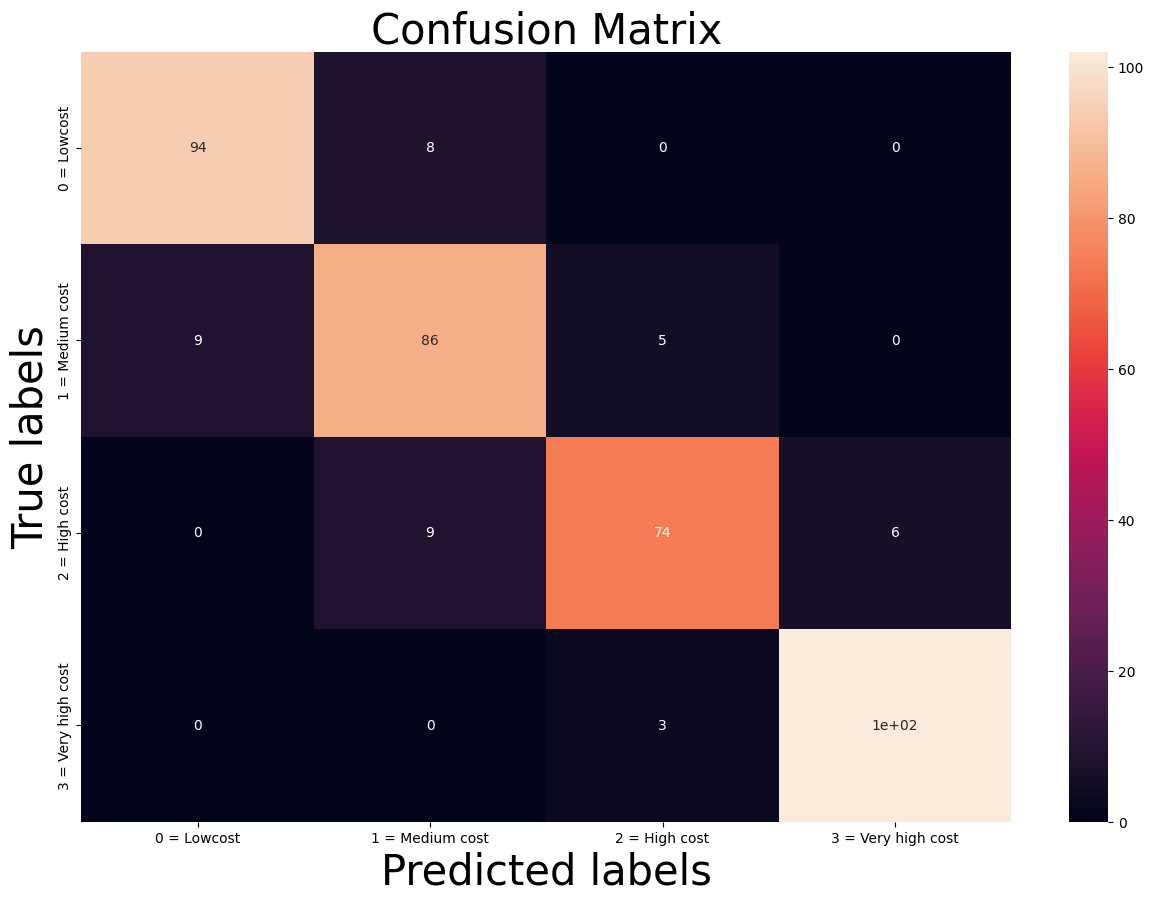

In [118]:
# Plotting the train confusion matrix

test_confusion_matrix(cm_test)

# **Comparision of all the models** 

In [119]:
Comparision_dict={'Model_Name':['Logistic Regression','Decision Tree','Random forest','KNN', 'Support Vector Machine'],
                  'Training_accuracy':[0.977,0.942,1.000,0.744,0.978],
                  'Test_accuracy':[0.951,0.839,0.895,0.600,0.908],
                  'Train_roc_auc_score':[0.999,0.989,1.000,0.919,0.999],
                  'Test_roc_auc_score':[0.996,0.954,0.974,0.843,0.986]}

In [120]:
Comparision_df=pd.DataFrame(Comparision_dict)

In [121]:
def barplots(x,y):
    plt.figure(figsize=(10,5))
    sns.barplot(data=Comparision_df, x='Model_Name', y=y, palette='ch:s=-.2,r=.6')

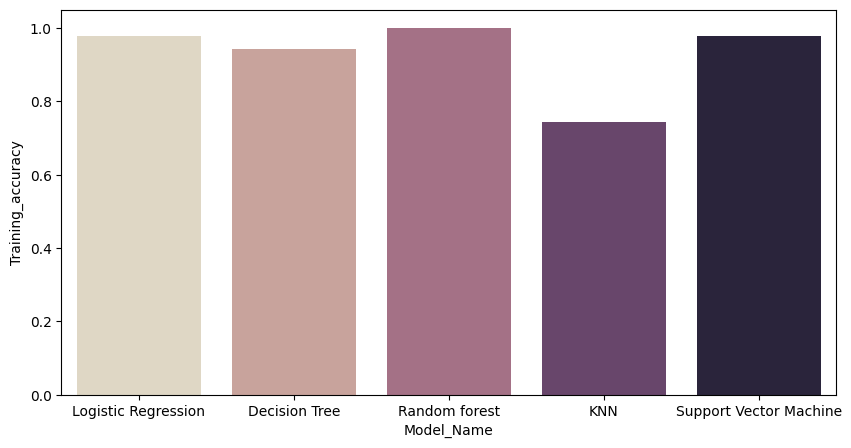

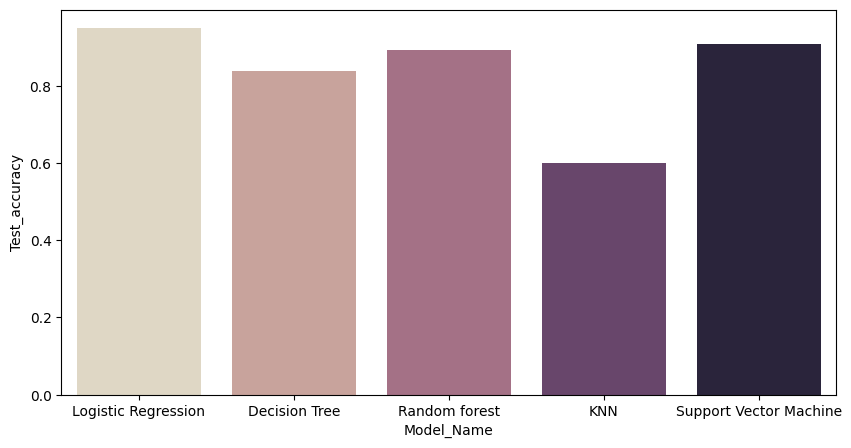

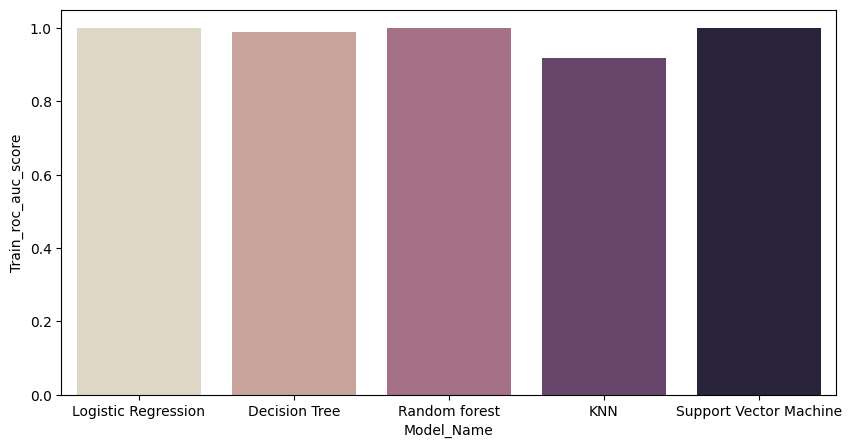

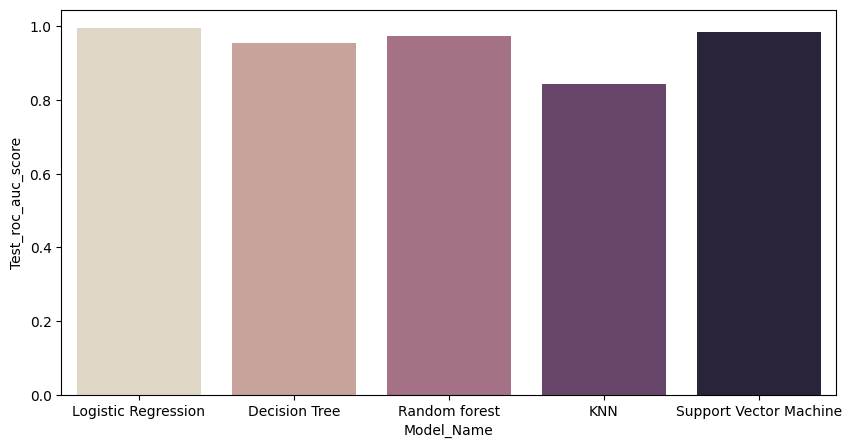

In [122]:
# Graphical Representation of comparisions of models.

y=['Training_accuracy','Test_accuracy','Train_roc_auc_score','Test_roc_auc_score']
for i in y:
    barplots('Model_Name',i)
    plt.show()

# **Conclusion** 
*   ## From all the above graphical visualisation shows that Logistic Regression is best model for production purpose.


*   ## As observed Logistic Regression and decision tree model performs well along with support vector machine.
*   ## Out of all the model Logistic Regression is perform well on overall basis.


*   ## Ram, Battery power, Mobile weight, Screen size and Pixels are key features in predicting the mobile price range.

